In [1]:
from pathlib import Path
import sys
import json
import datetime

PROJ_DIR = Path.cwd().parent.parent
sys.path.append(str(PROJ_DIR))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import animation
import matplotlib.font_manager as fm
from IPython.display import HTML
fm.fontManager.addfont('../resources/arial.ttf')

import numpy as np
import pandas as pd

from src.defaults import ROOT_DIR
from src.checkpoint import CheckpointableData, Checkpointer
from src.config import BaseConfig, Require
from src.shared import get_env
from src.smbpo import SMBPO
from src.tester import Tester
from src.viz_tracking.opt_controller import OptController

ROOT_DIR = Path(ROOT_DIR)
assert ROOT_DIR.is_dir(), ROOT_DIR
LOGS_DIR = ROOT_DIR / 'logs' / 'tracking'

params = {
    'font.family': 'Arial',
    'font.serif': 'Arial',
    # 'font.style': 'italic',
    # 'font.weight': 'normal', #or 'blod'
    'font.size': 15,  # or large,small
    'animation.ffmpeg_path': r'/usr/bin/ffmpeg'
}
rcParams.update(params)

class Config(BaseConfig):
    env_name = "tracking"
    env_cfg = {
        "pre_horizon" : 10,
        "surr_veh_num" : 1,
    }
    seed = 1
    epochs = 600
    alg_cfg = SMBPO.Config()
    alg = 'DRPO'
    opt_args = {
        "num_pred_step": 20,
        "gamma": 0.99,
        "mode": "shooting",
        "minimize_options": {
            "max_iter": 200,
            "tol": 1e-3,
            "acceptable_tol": 1e-2,
            "acceptable_iter": 50,
            # "print_level": 5,
        },
        "use_terminal_cost": False,
        "verbose": 1,
    }

/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/yudongjie/safe_proj/safe-control-gym/safe_control_gym/utils/configuration.py:72: UserWarning: No agent/task config given.
  warnings.warn("No agent/task config given.")
/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Test log directory: /home/yudongjie/safe_proj/Safe_MBRL/logs/tracking/02-21-23_02.20.50_DRPO_99/MPC
env <SimuVeh3dofcontiSurrCstr2 instance>
surr 0: d_lon: 8, d_lat: 3.5, u: 4.5

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.007639200426638126 



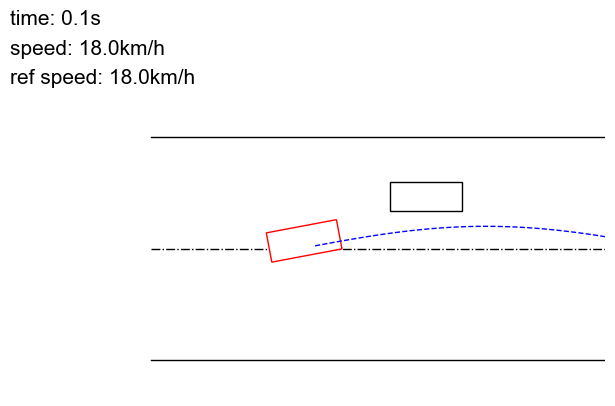

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.00869041308760643 



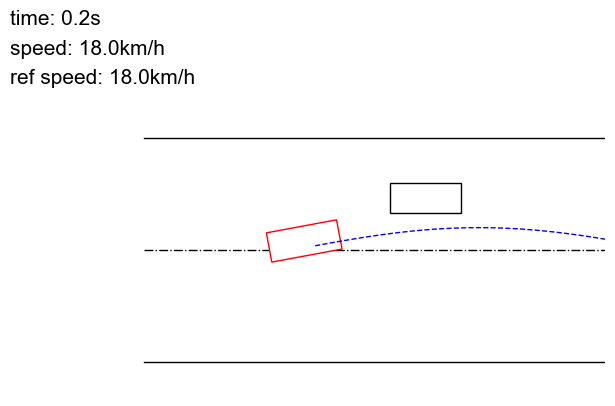

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.009857925586402416 



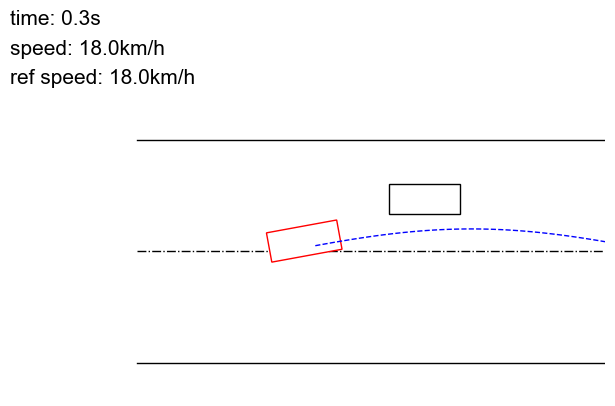

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.011142036877572536 



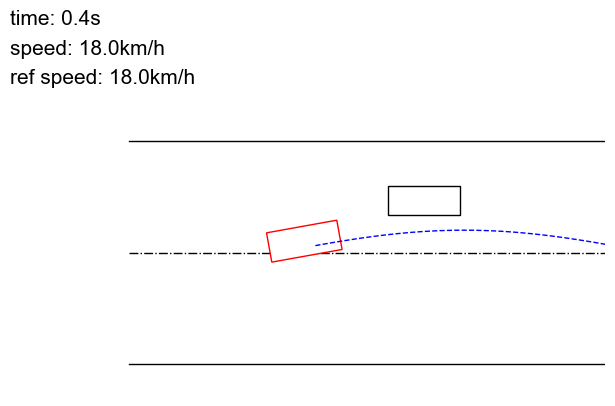

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.012538322247564793 



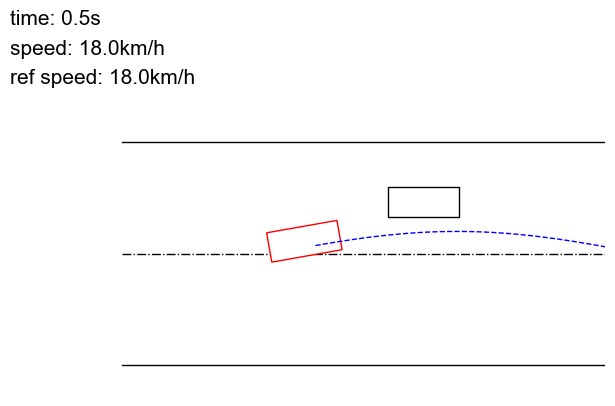

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.014038055203855038 



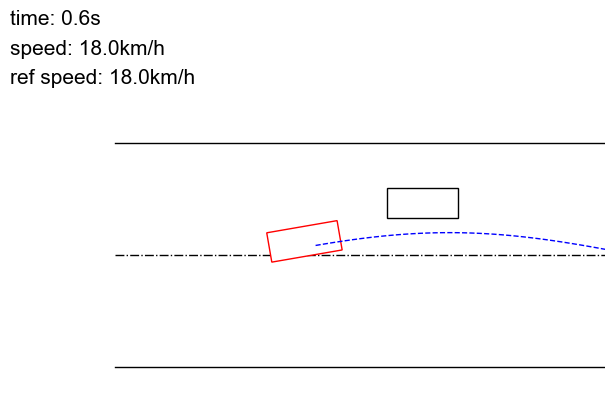

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.0156310573220253 



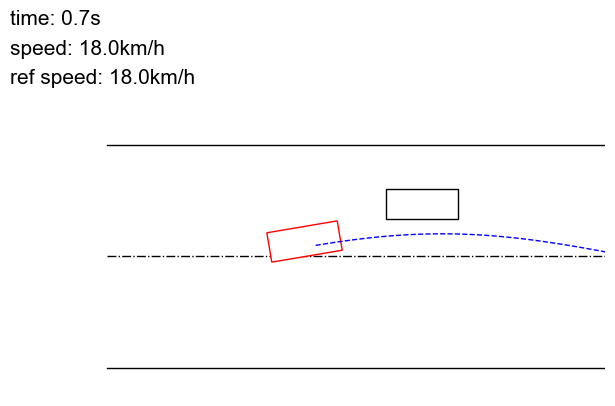

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.017304198816418648 



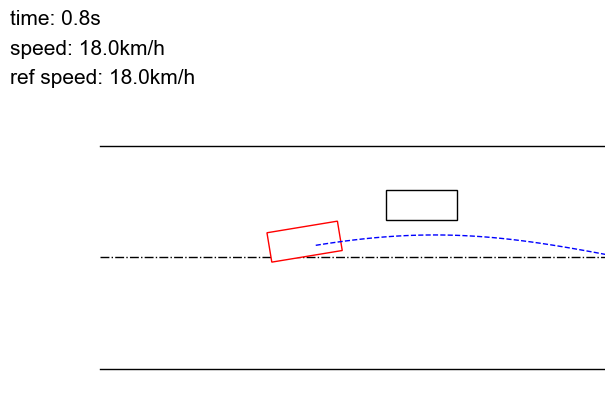

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.019035357981920242 



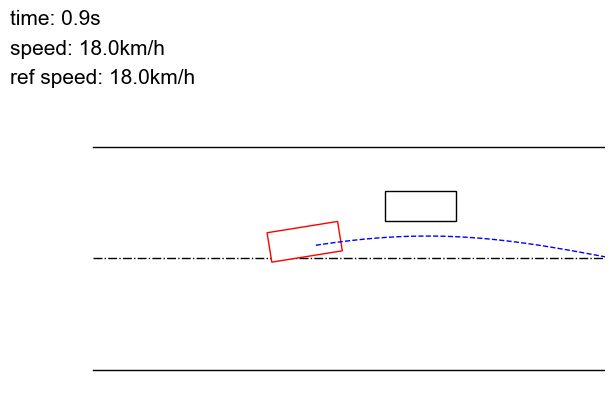

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.020801350474357605 



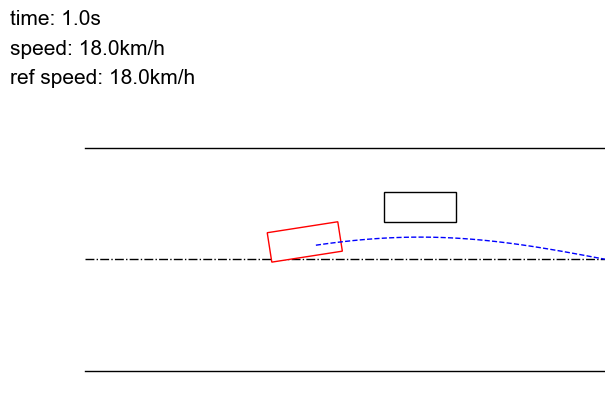

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.022588156163692474 



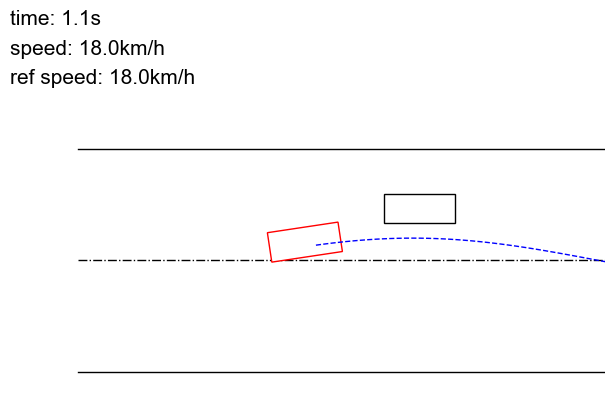

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.024370554834604263 



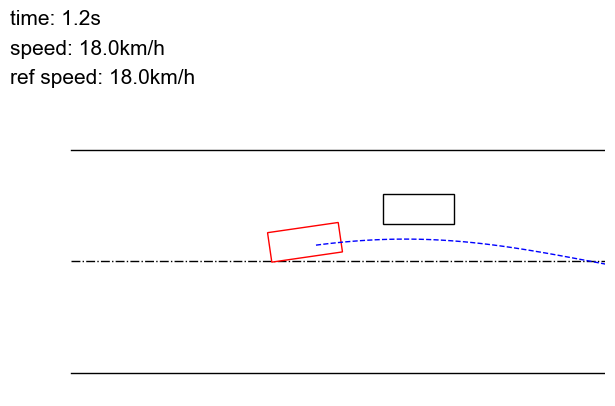

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.02612297050654888 



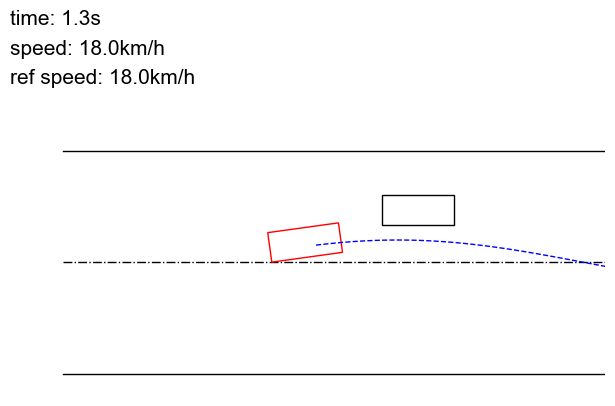

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.027819281443953514 



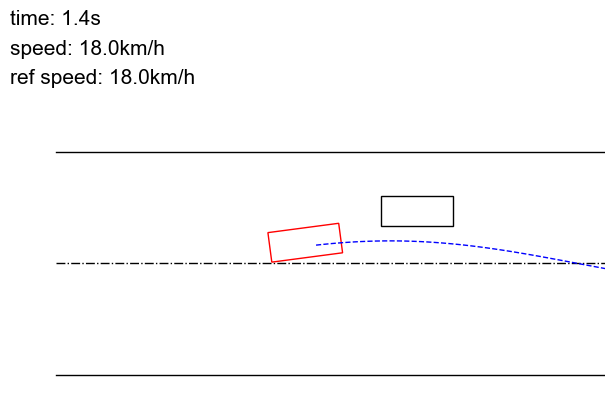

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.029435312375426292 



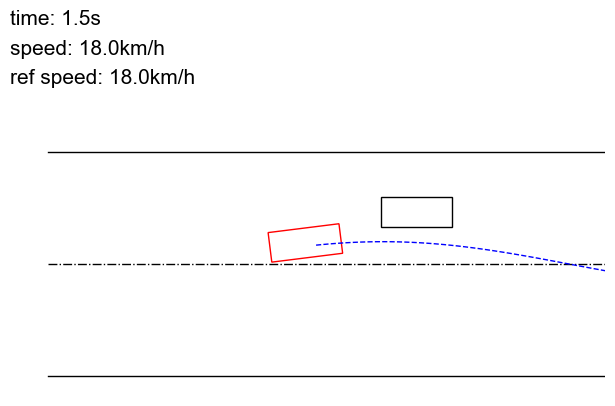

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03094732202589512 



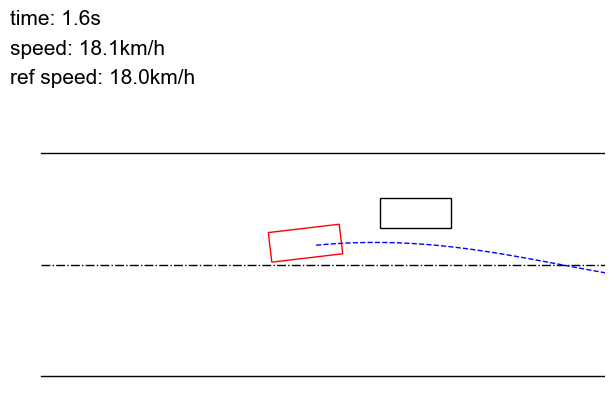

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03233090415596962 



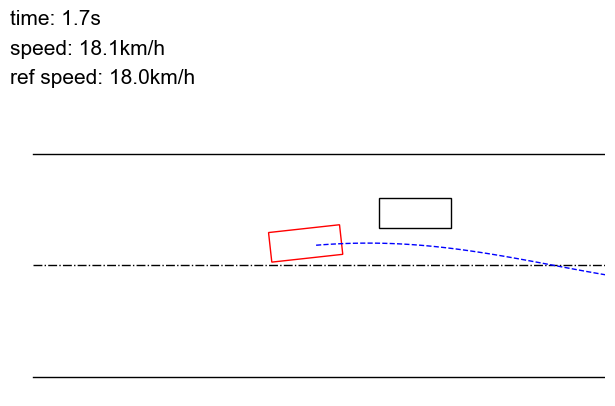

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03356369957327843 



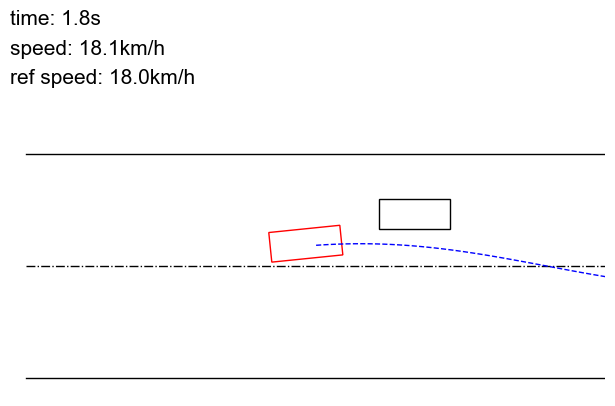

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.0346219465136528 



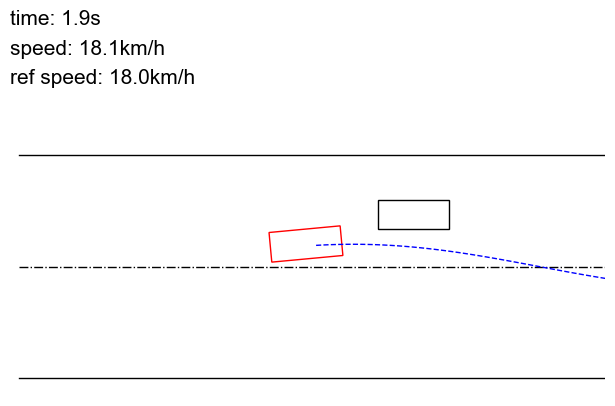

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.035488542169332504 



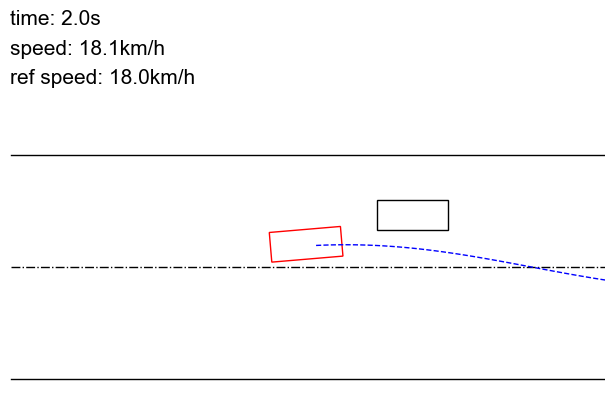

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.036147549748420715 



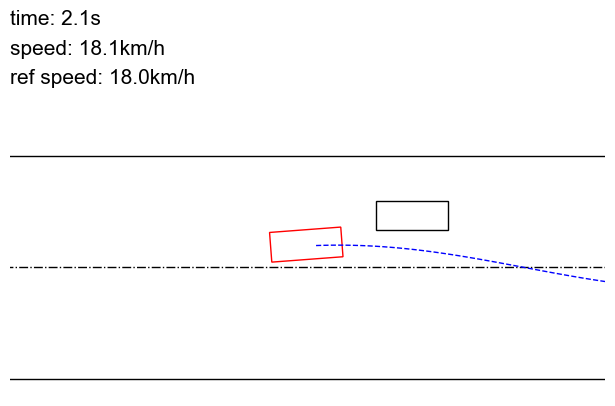

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.0365871787071228 



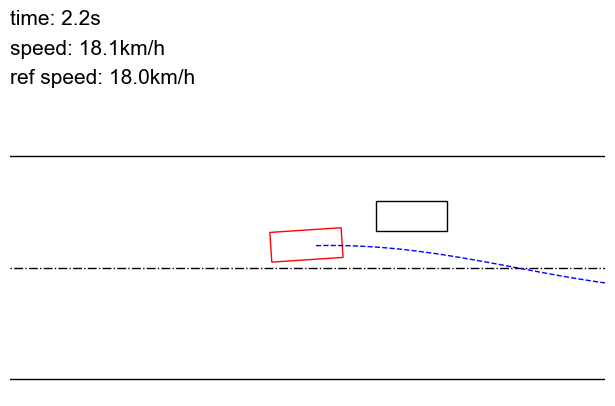

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.03679896518588066 



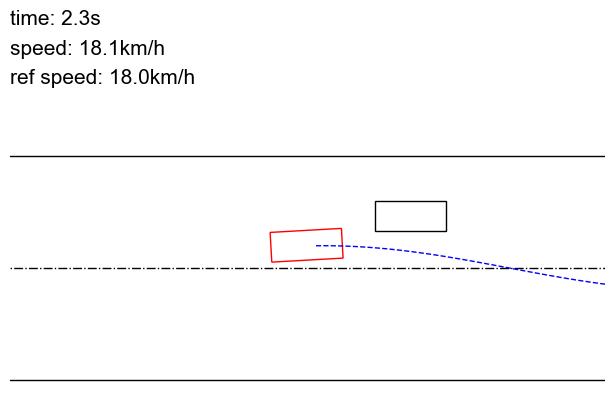

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.03677964210510254 



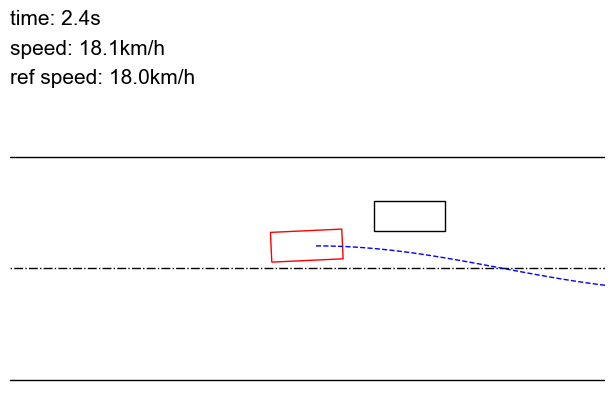

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.036530788987874985 



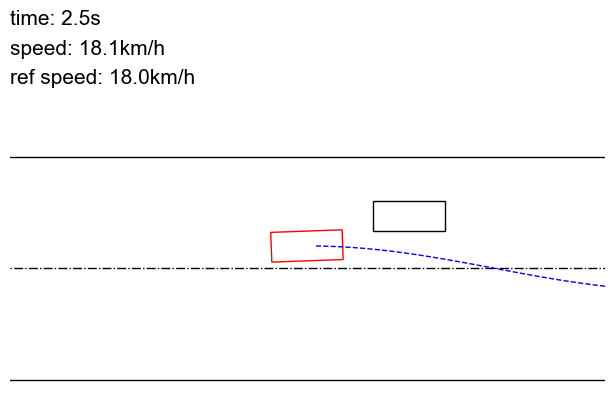

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.03605761006474495 



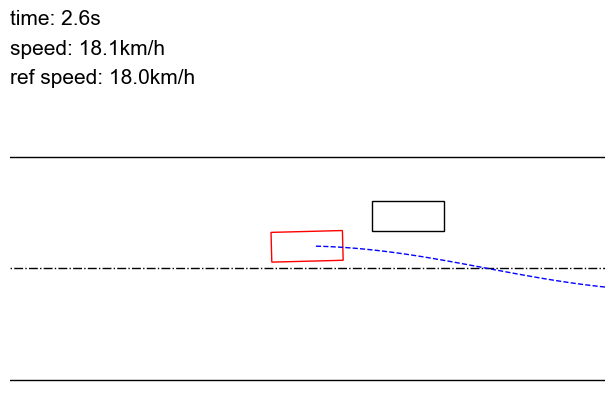

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.03537115827202797 



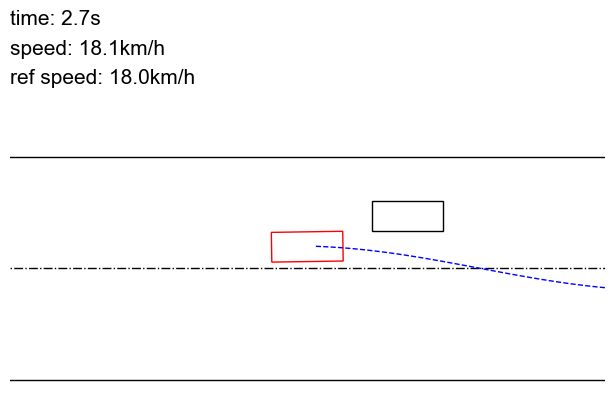

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 7
* Constraint calls: 15
* System simulations: 22
* Final cost: 0.03448352590203285 



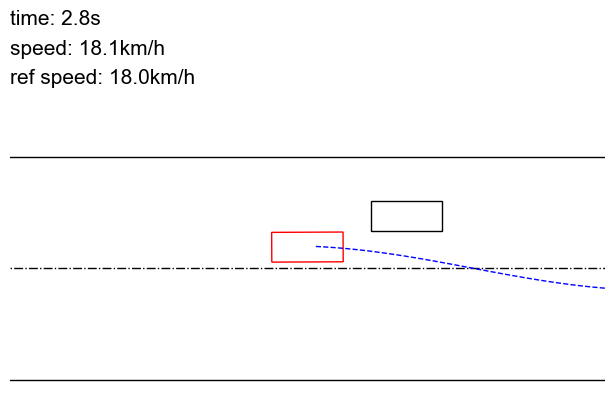

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.03341510519385338 



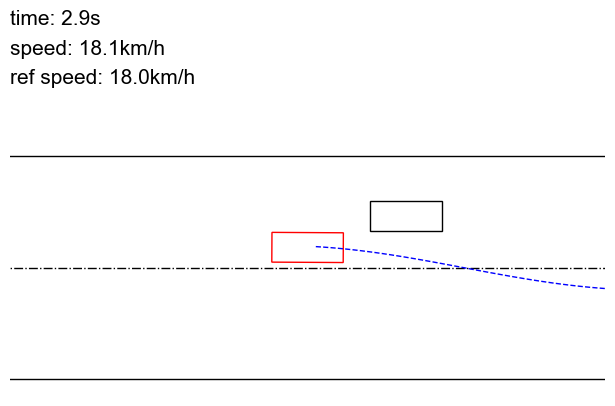

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.03218727558851242 



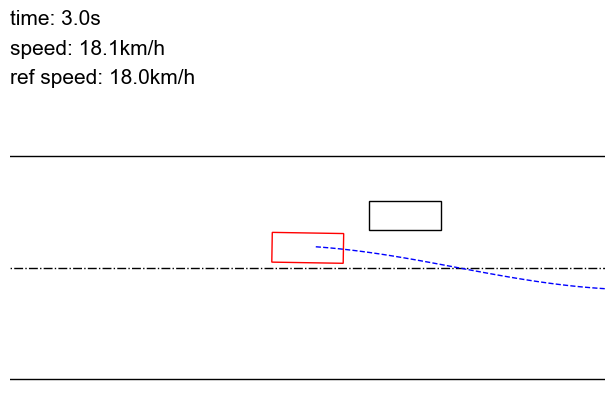

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.030826091766357422 



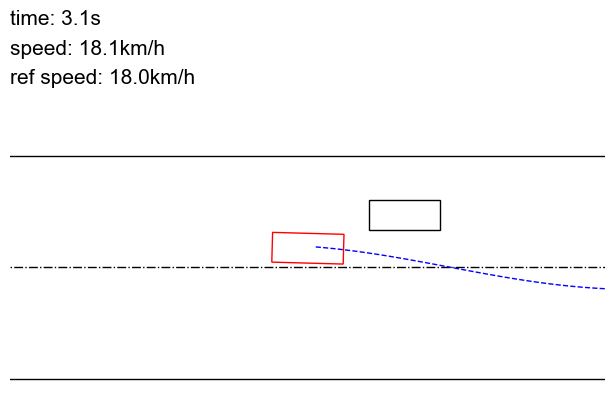

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.029360586777329445 



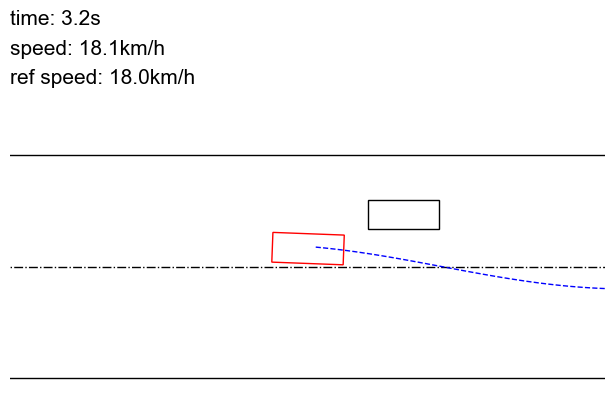

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.027820441871881485 



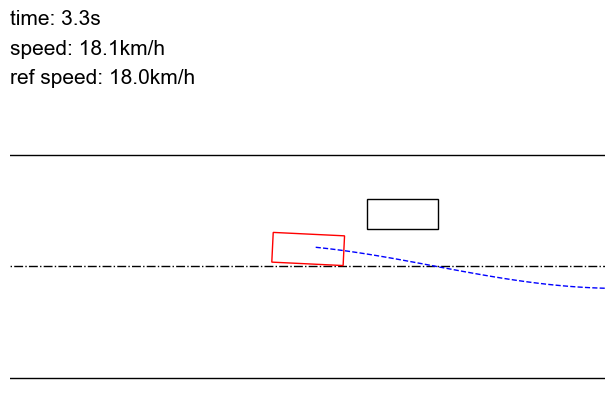

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 7
* Constraint calls: 15
* System simulations: 22
* Final cost: 0.026237566024065018 



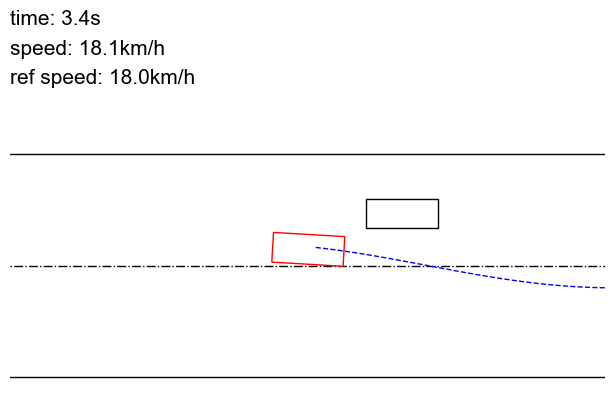

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.02464328706264496 



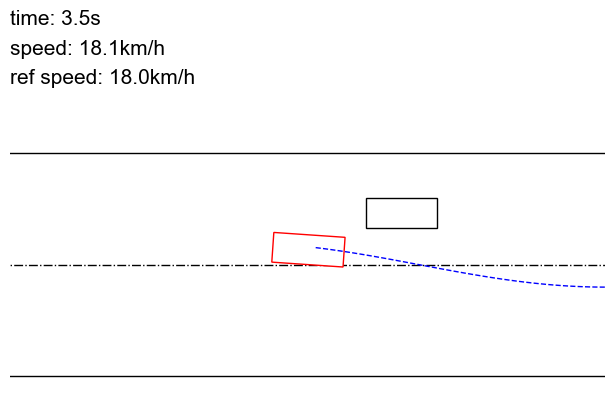

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 7
* Constraint calls: 15
* System simulations: 22
* Final cost: 0.02306819148361683 



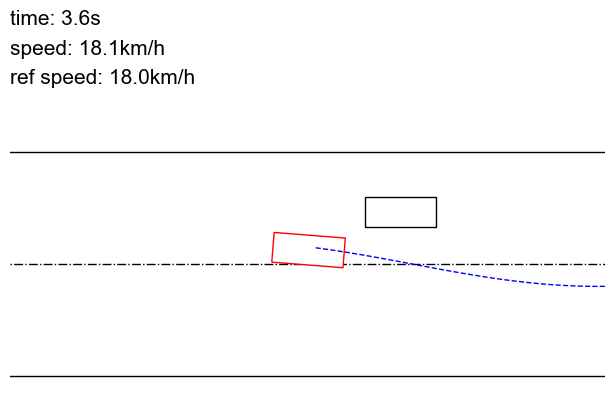

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.02153969369828701 



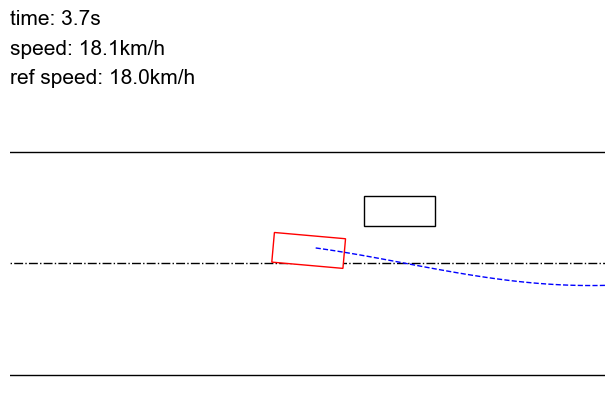

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.020082350820302963 



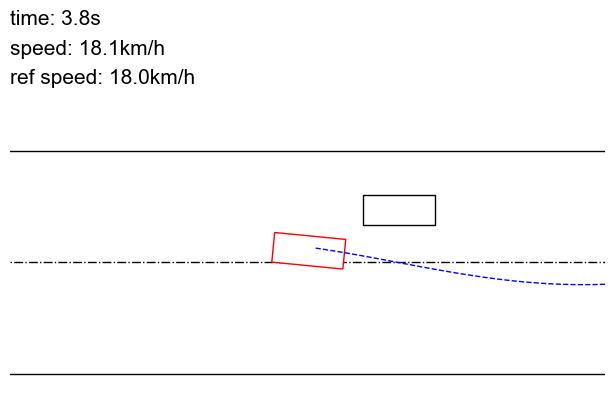

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.018722284585237503 



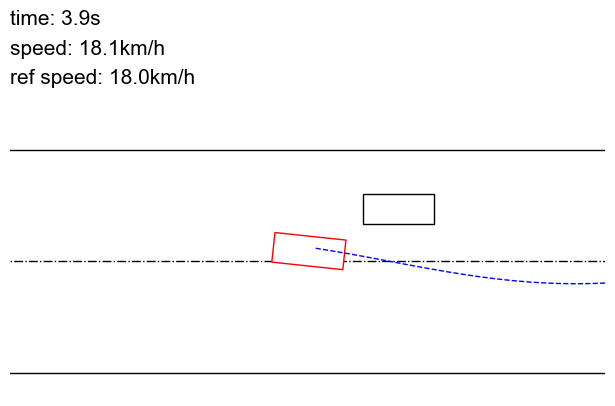

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.017482591792941093 



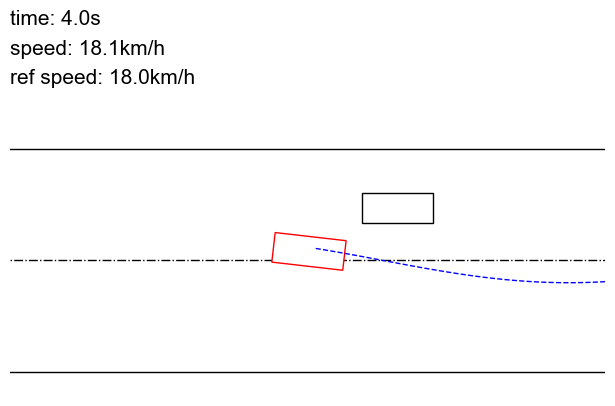

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.016385003924369812 



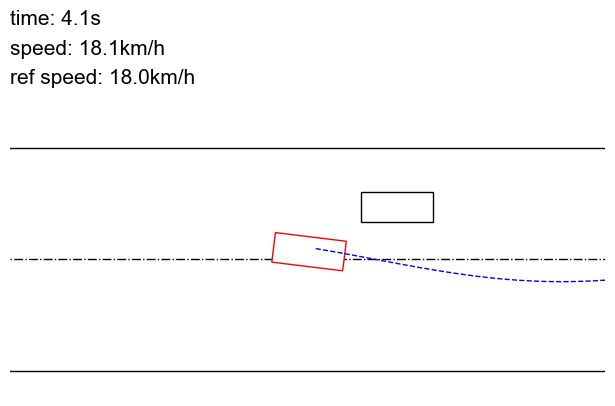

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.015447433106601238 



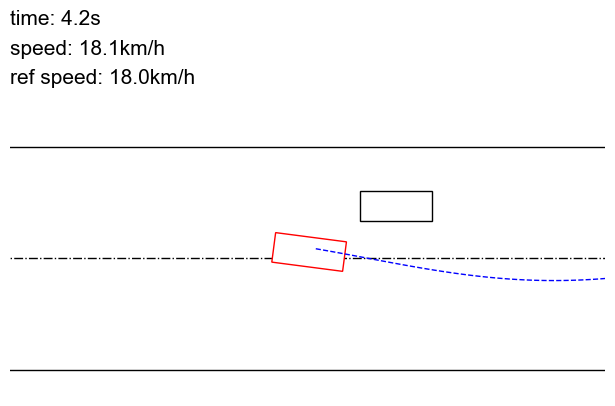

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.014683890156447887 



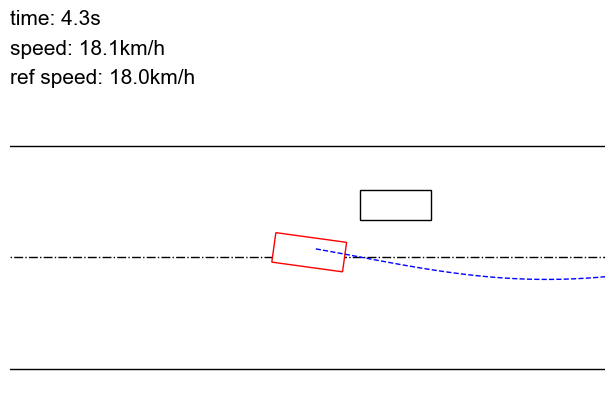

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.014111901633441448 



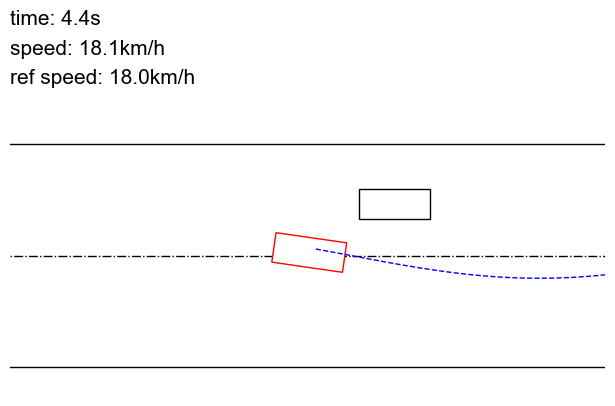

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.013719122856855392 



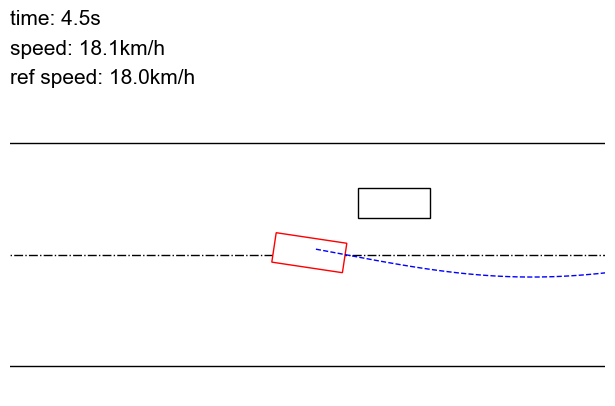

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.01351922657340765 



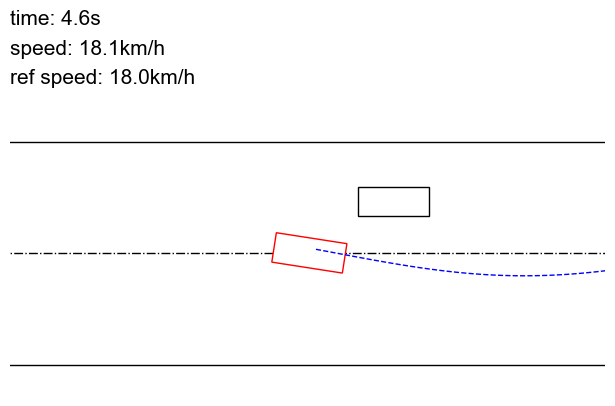

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.013509275391697884 



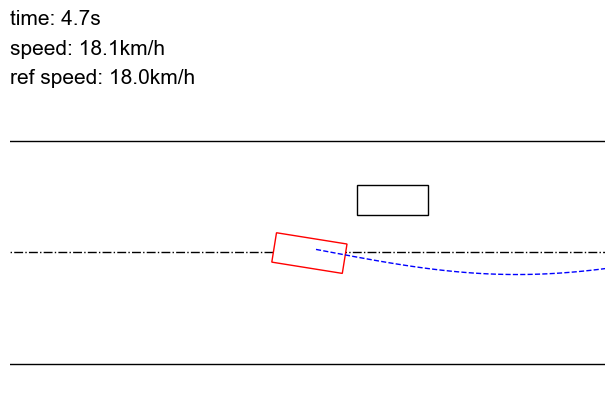

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.01368427649140358 



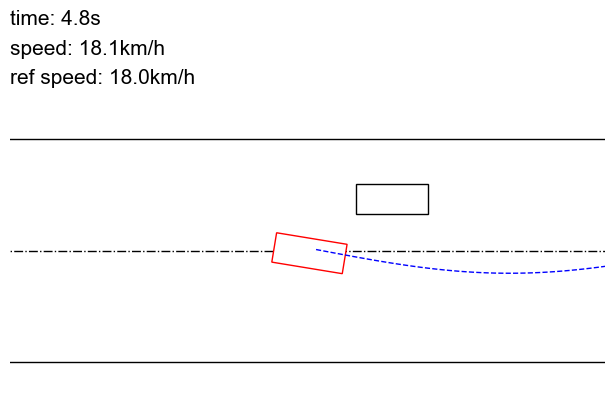

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.014039031229913235 



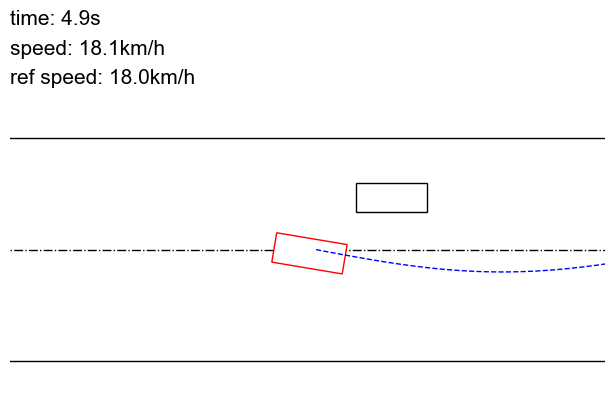

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.014568053185939789 



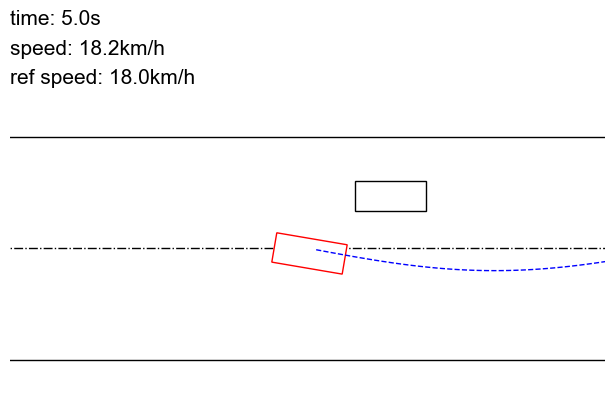

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.01526032853871584 



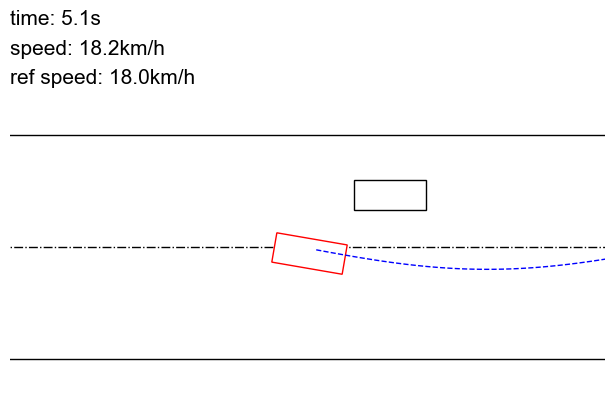

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.016101857647299767 



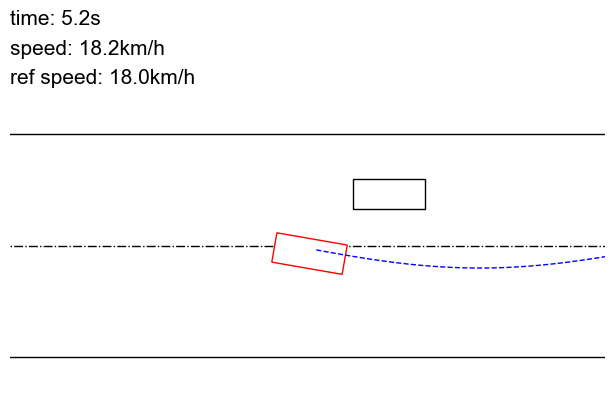

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.017081383615732193 



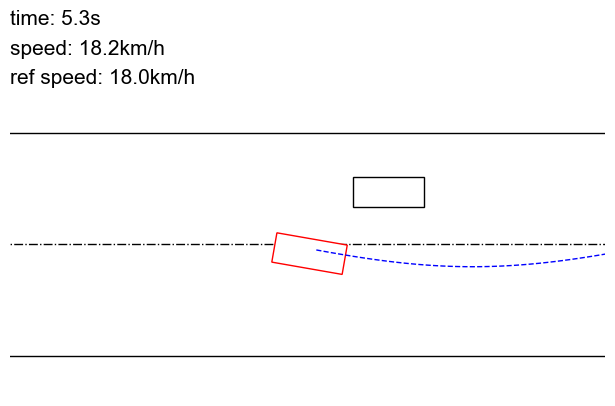

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.018188055604696274 



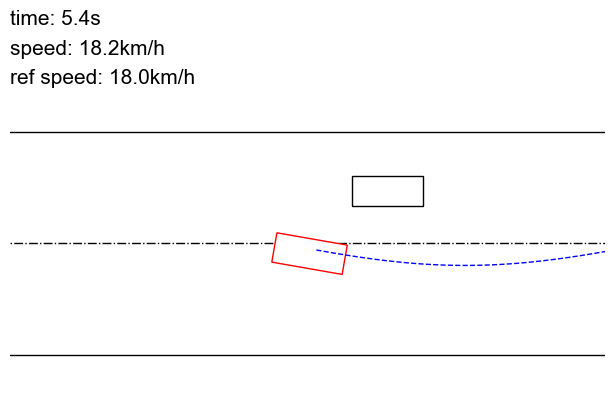

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.019404636695981026 



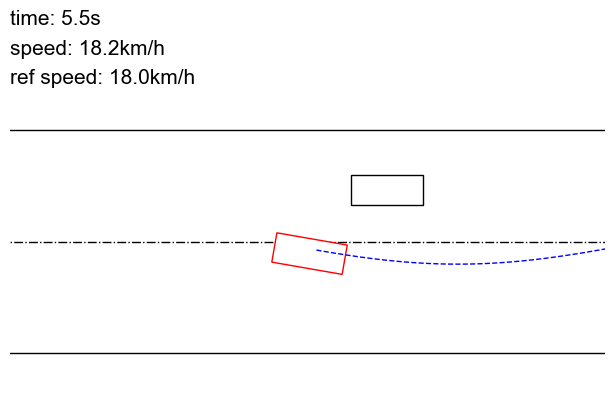

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.020715836435556412 



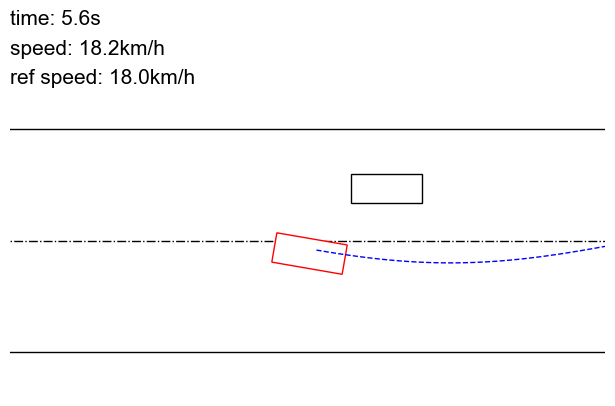

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.022103549912571907 



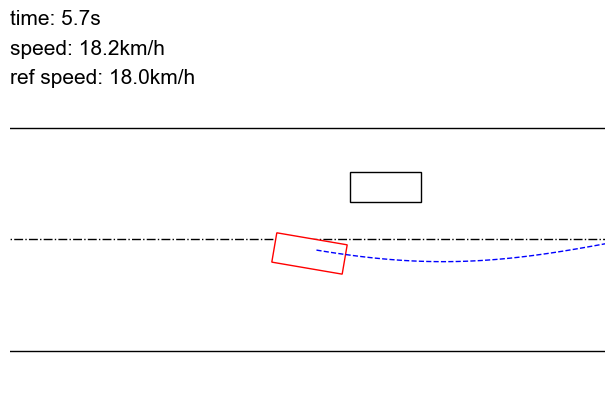

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.02354525774717331 



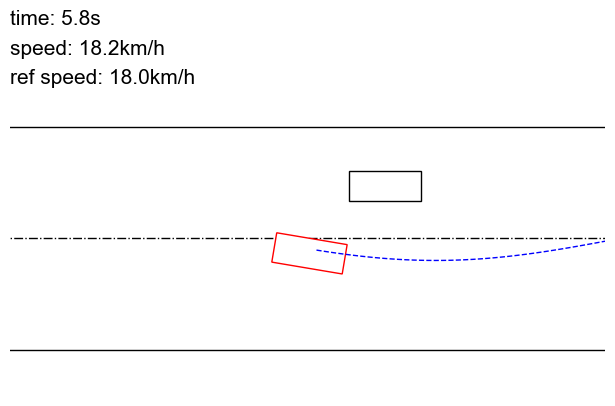

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.02503216080367565 



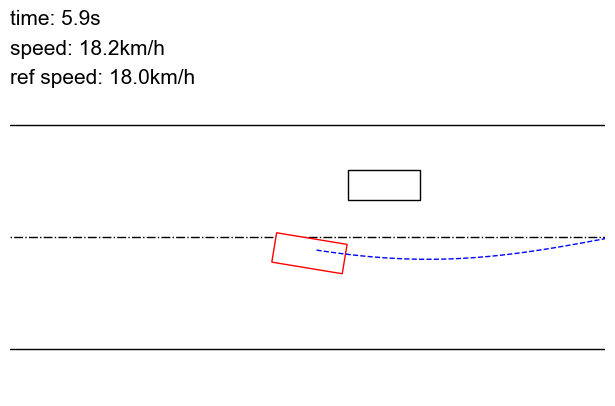

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.026534298434853554 



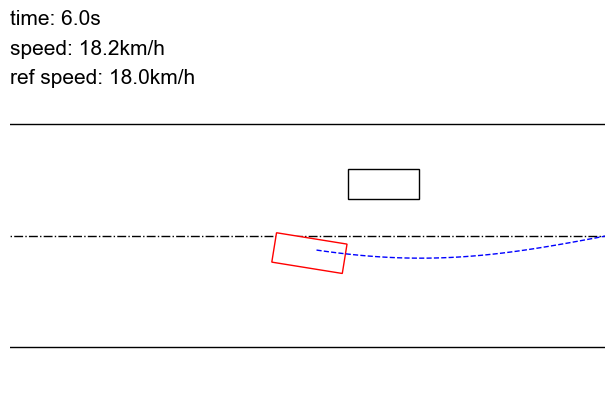

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.028035493567585945 



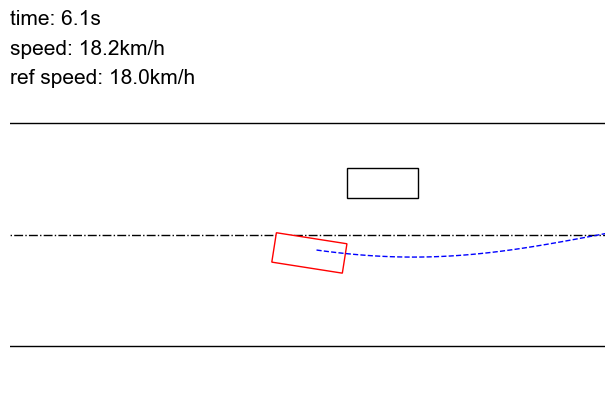

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.029511282220482826 



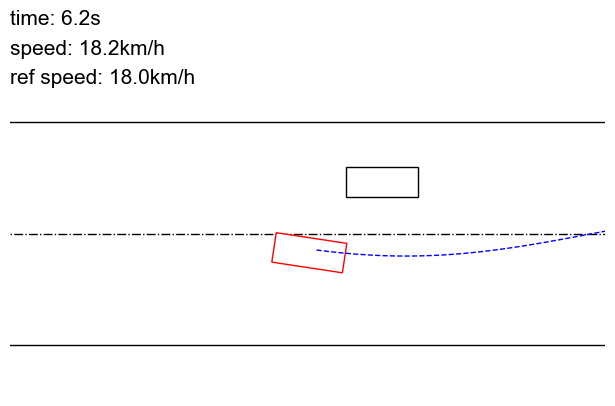

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.030947787687182426 



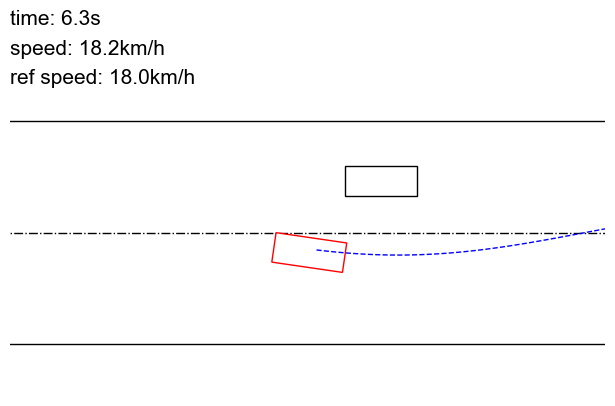

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03230968117713928 



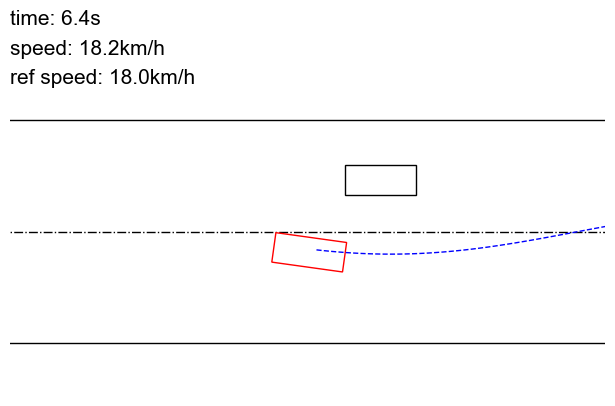

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.0335879772901535 



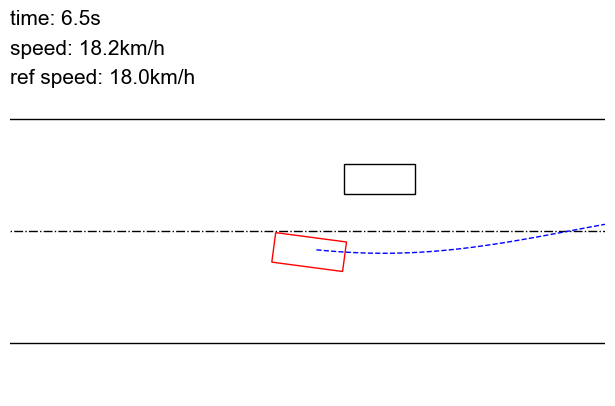

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03475651890039444 



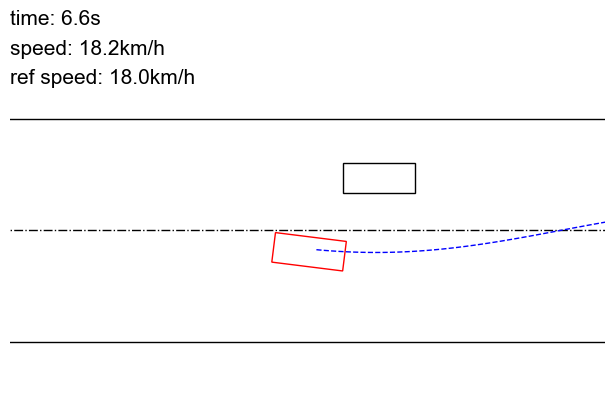

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.035795554518699646 



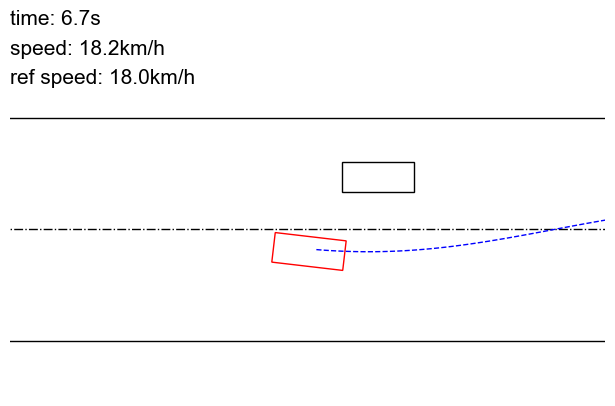

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.036694057285785675 



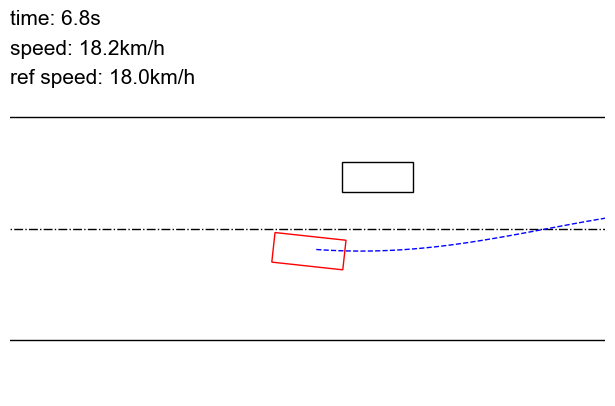

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03741857036948204 



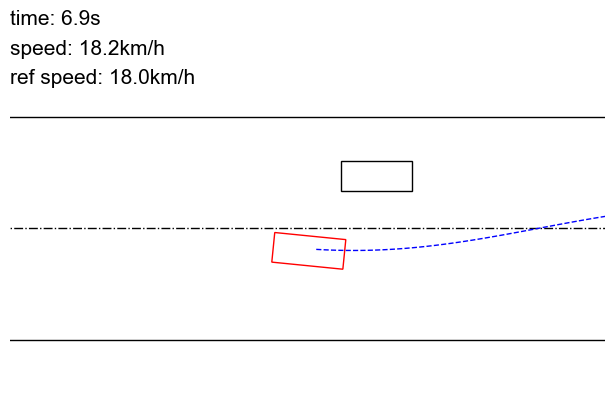

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.037936098873615265 



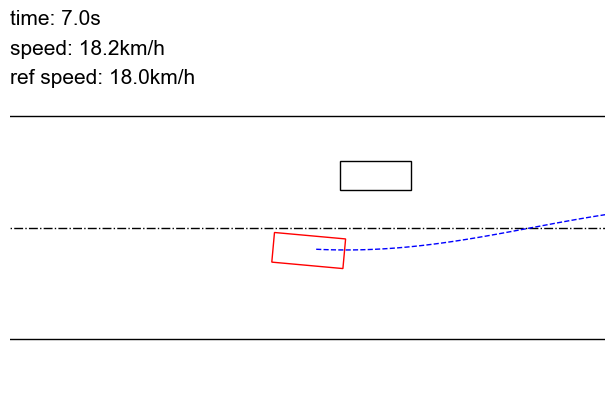

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03826671838760376 



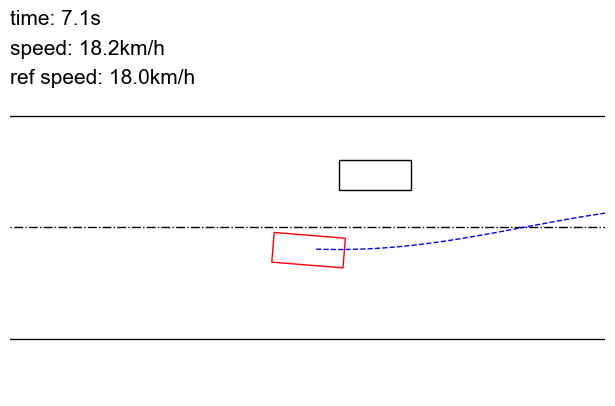

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03838349133729935 



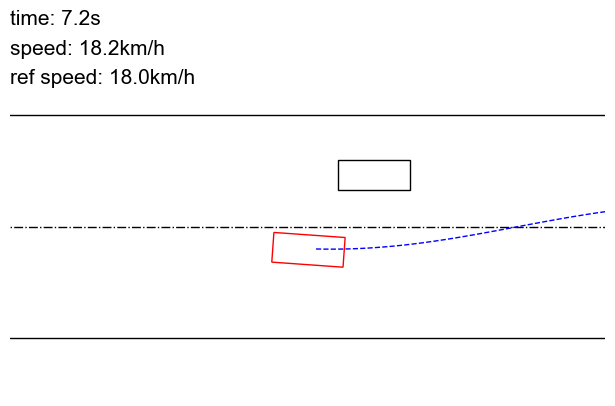

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03825227543711662 



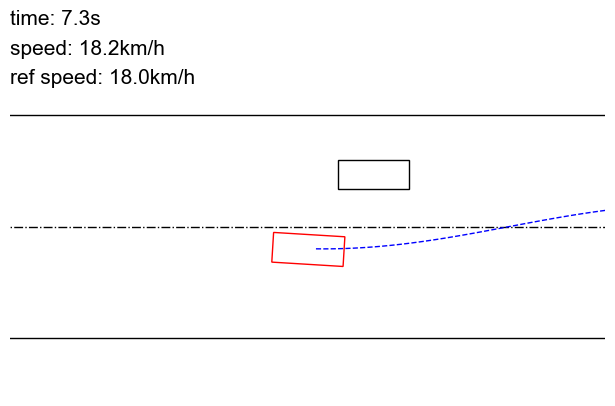

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.0379137247800827 



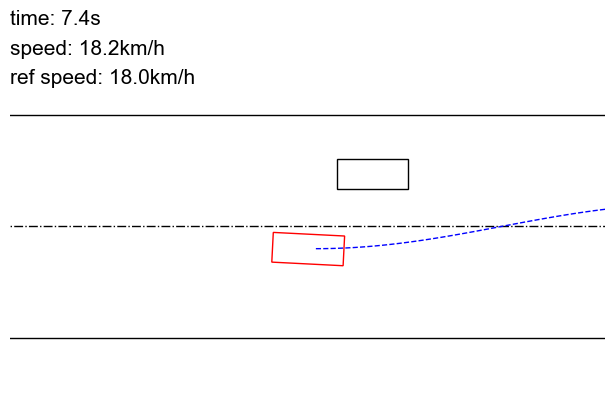

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03736792504787445 



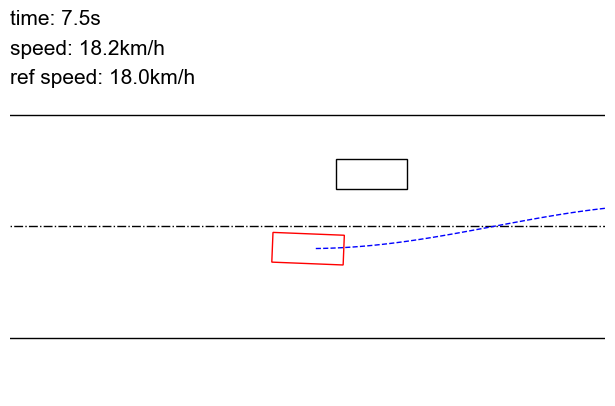

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03659425675868988 



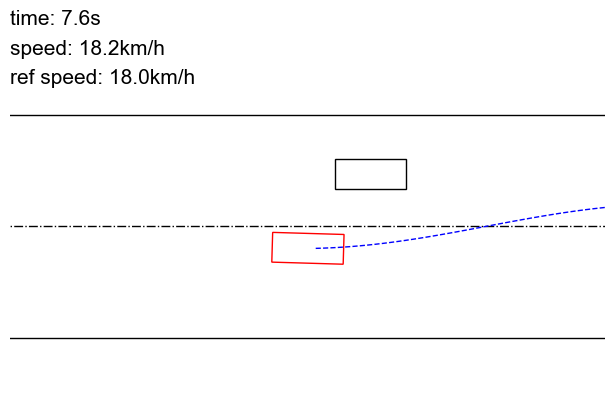

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03558935970067978 



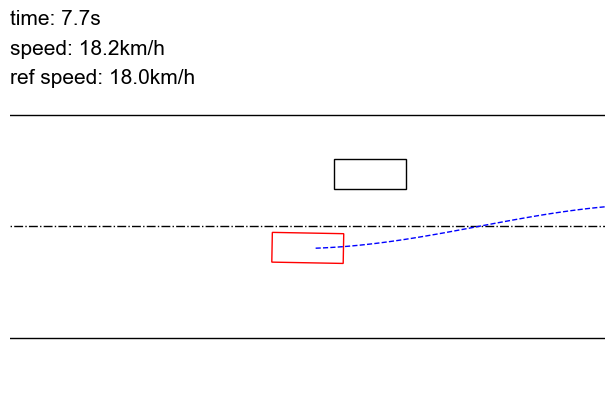

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.034374088048934937 



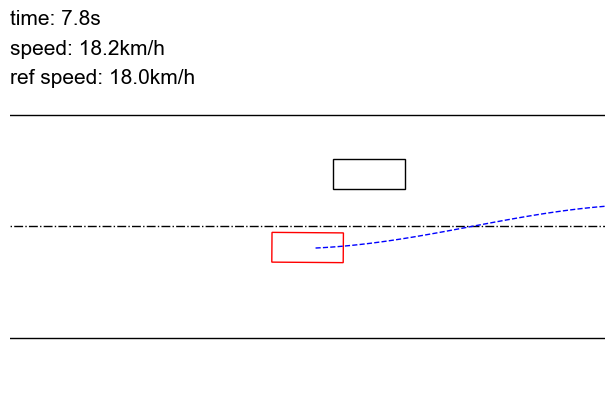

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03299488499760628 



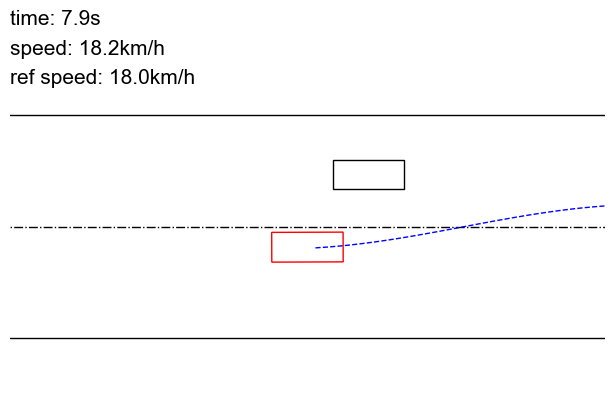

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.031452395021915436 



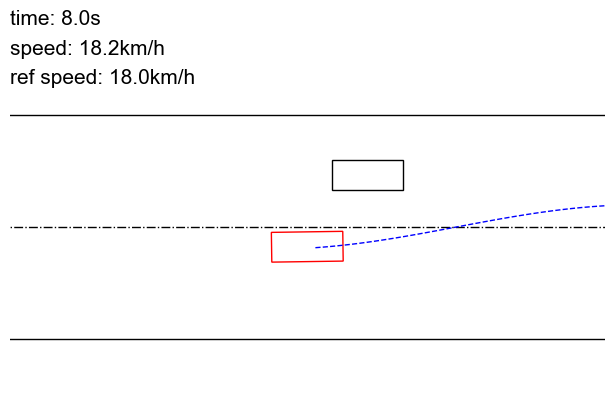

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.02976500801742077 



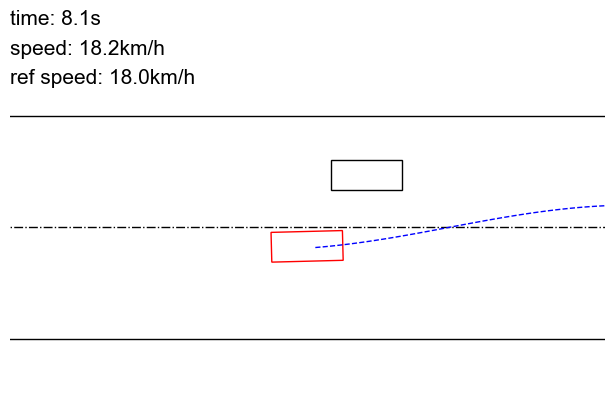

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.02795758843421936 



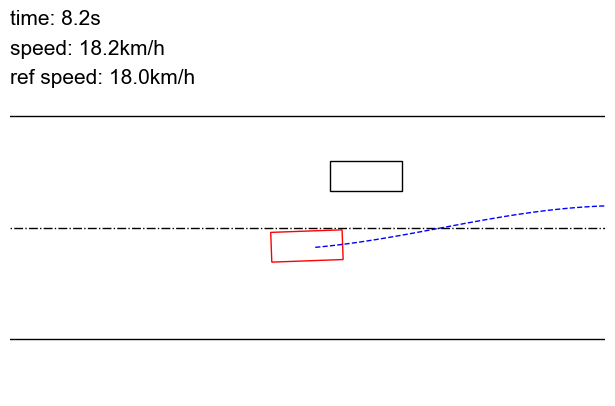

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.026056068018078804 



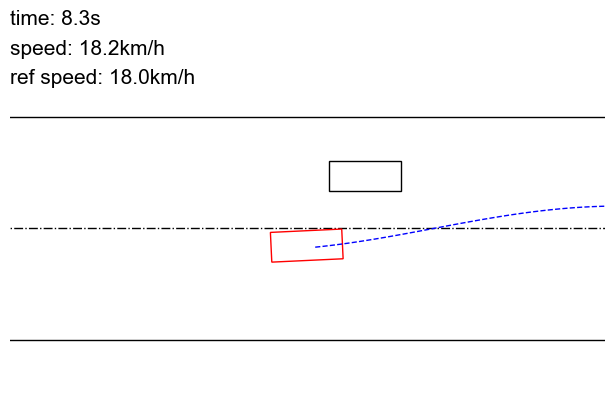

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.024090921506285667 



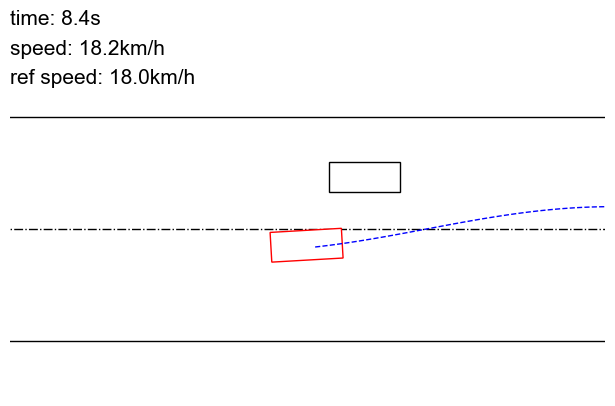

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.02208860032260418 



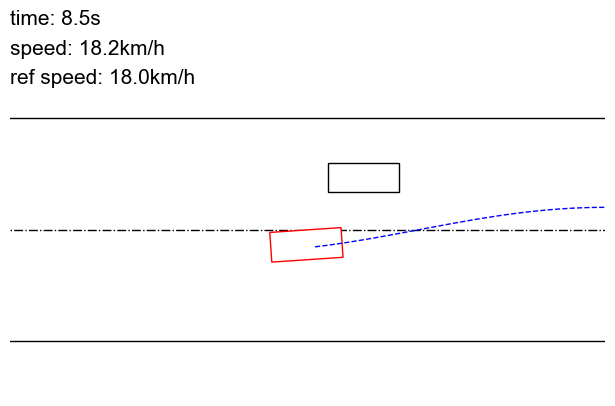

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.020068934187293053 



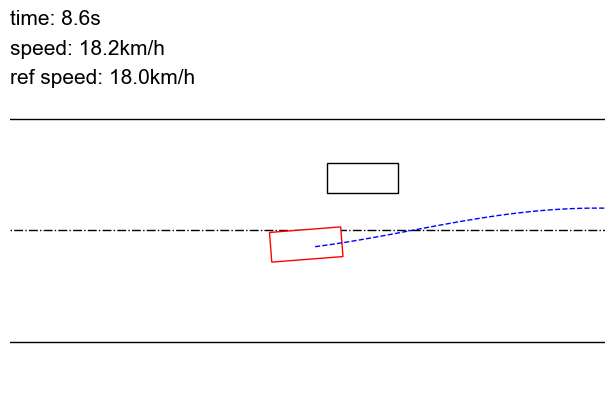

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.018112042918801308 



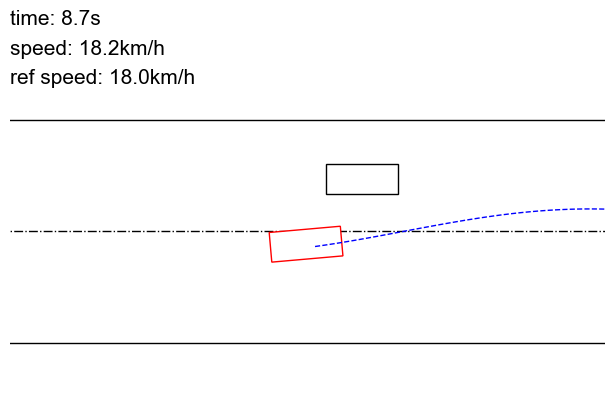

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.017395343631505966 



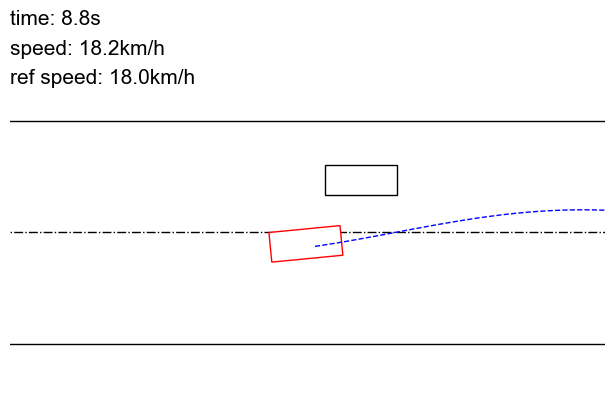

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.01913682371377945 



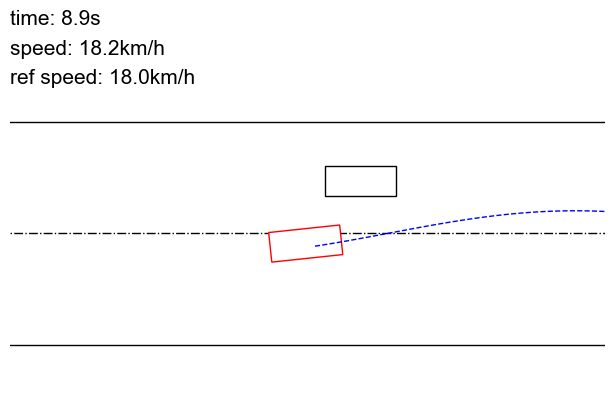

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.023011624813079834 



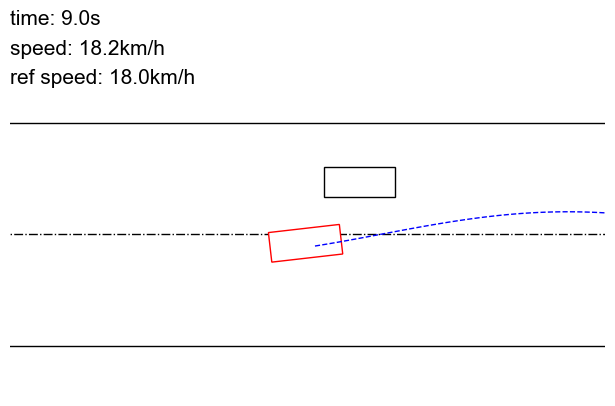

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.028700871393084526 



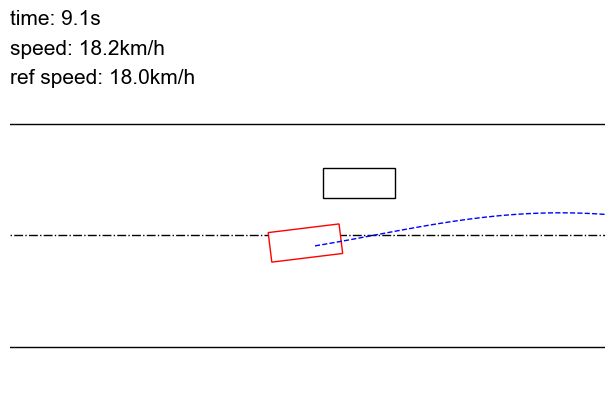

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03587641194462776 



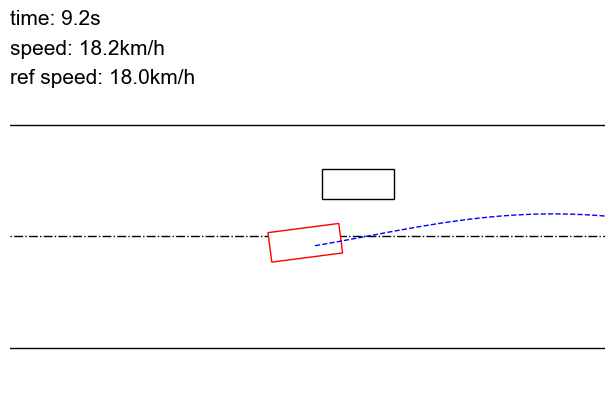

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.0441959872841835 



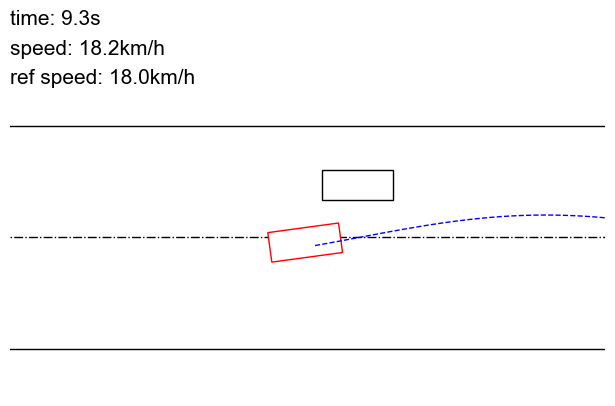

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.053342681378126144 



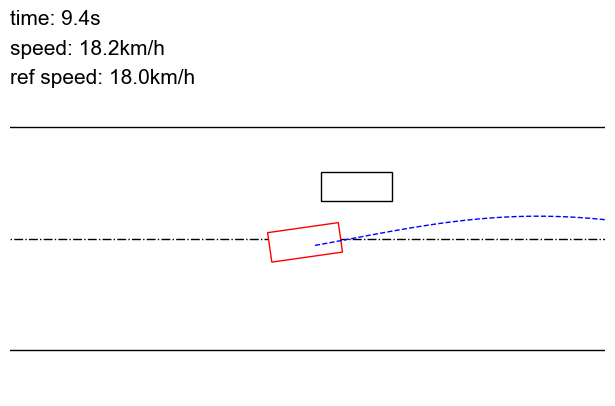

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.06297703087329865 



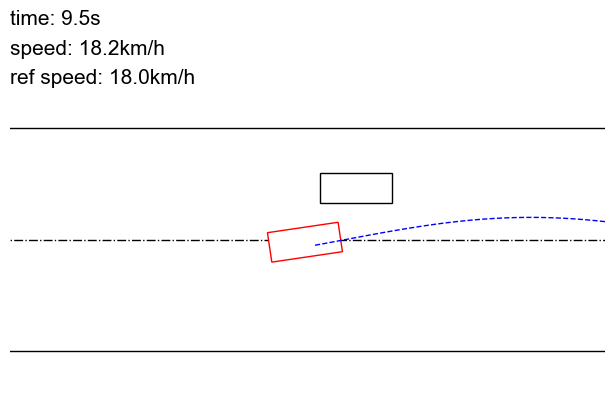

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.07307310402393341 



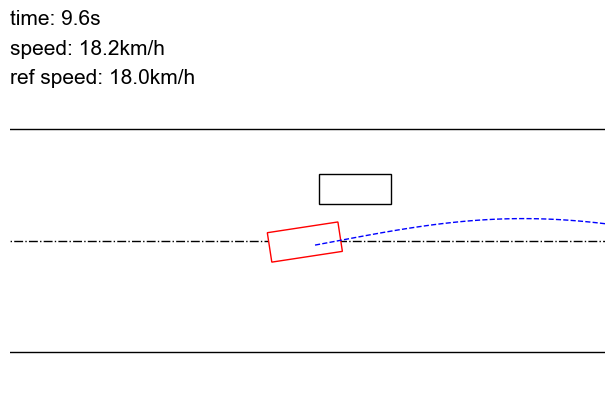

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.0842963457107544 



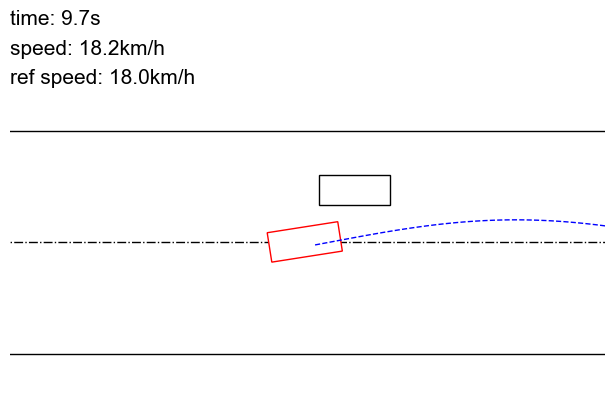

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.09680000692605972 



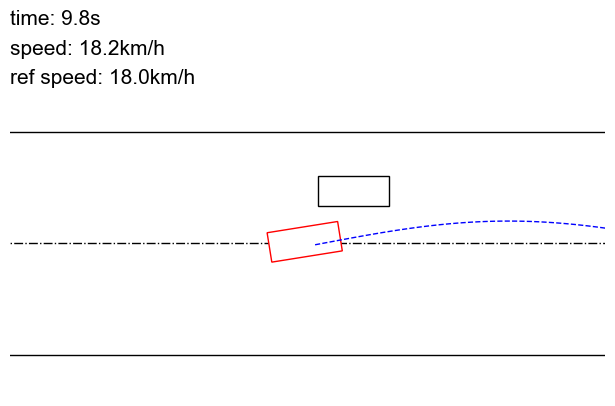

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.11053666472434998 



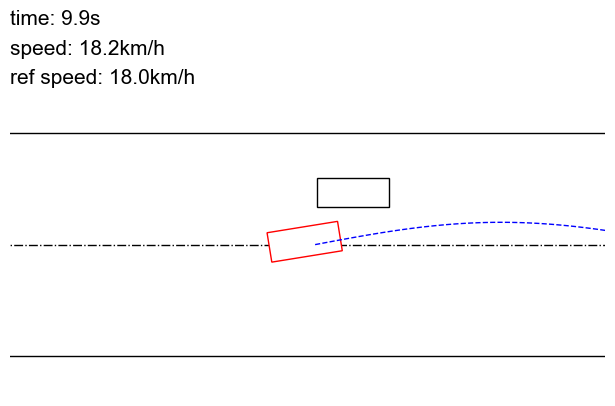

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.1253604292869568 



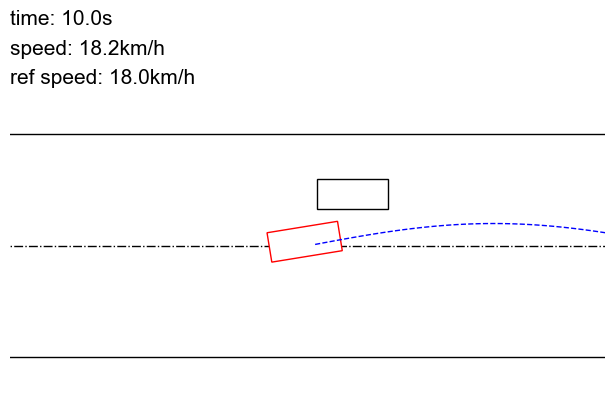

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.141032412648201 



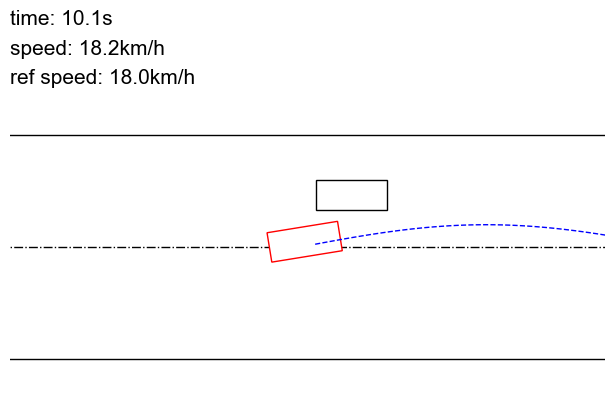

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.1572411209344864 



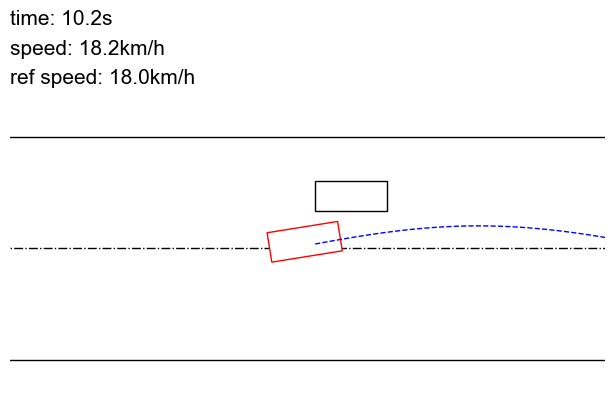

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.17360825836658478 



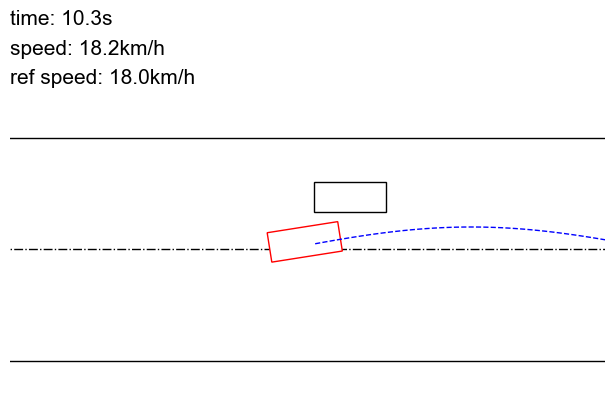

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.1897851675748825 



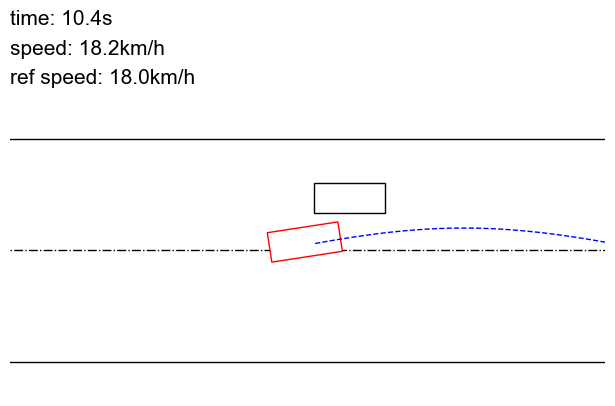

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.20533430576324463 



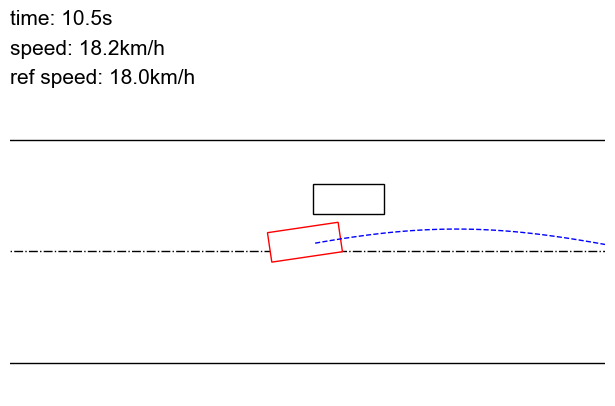

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.2198360115289688 



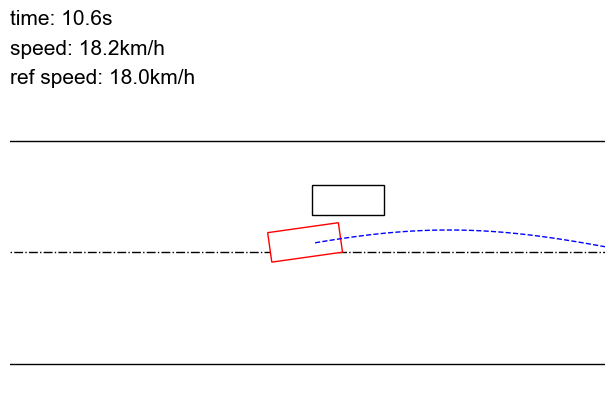

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.23287275433540344 



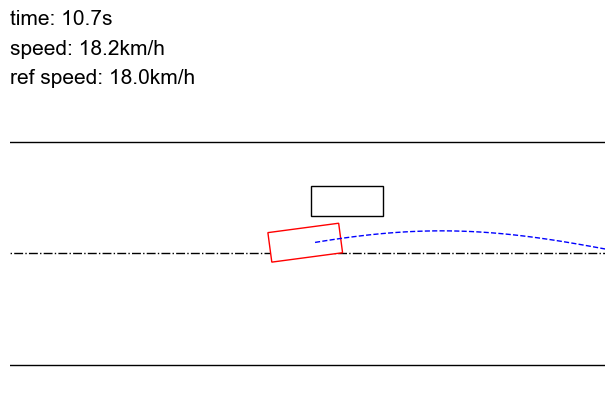

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.24403737485408783 



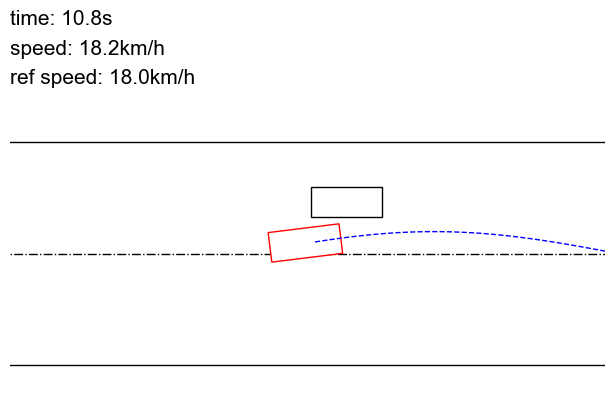

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.2529503405094147 



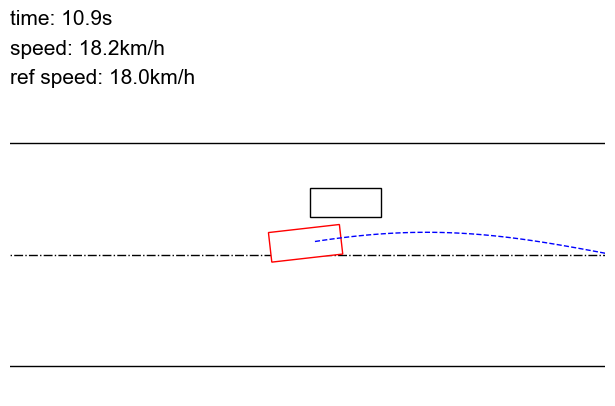

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.2593541145324707 



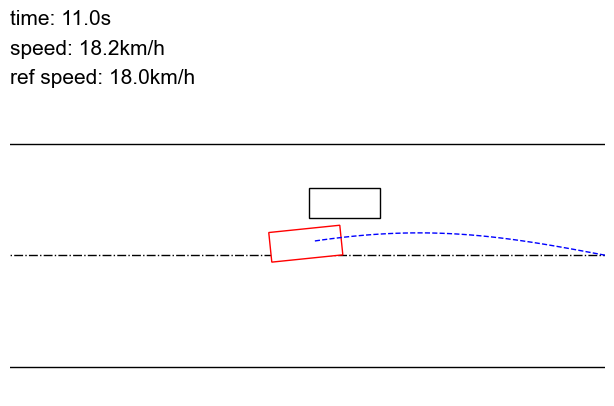

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.2631545662879944 



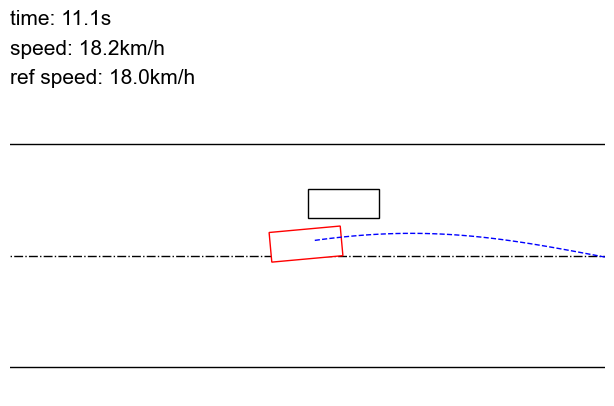

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.267088383436203 



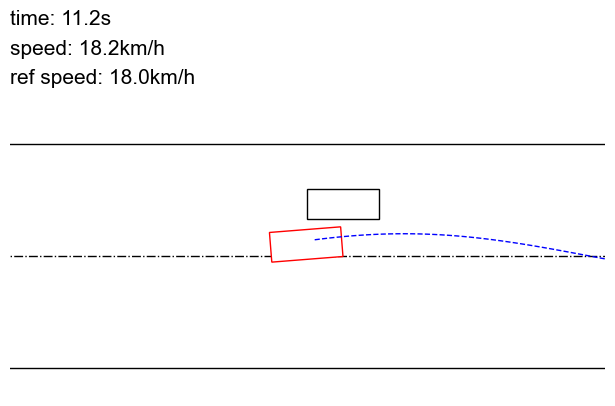

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.27057814598083496 



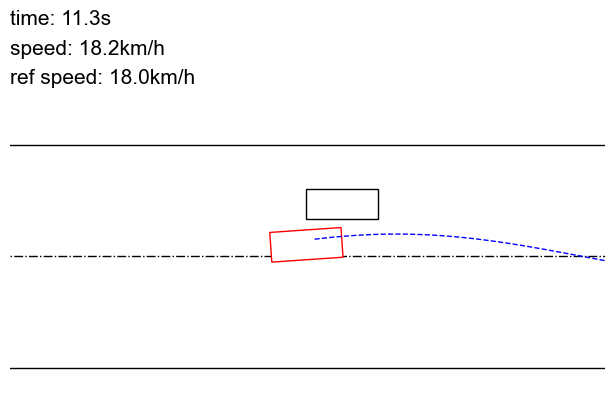

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.27298521995544434 



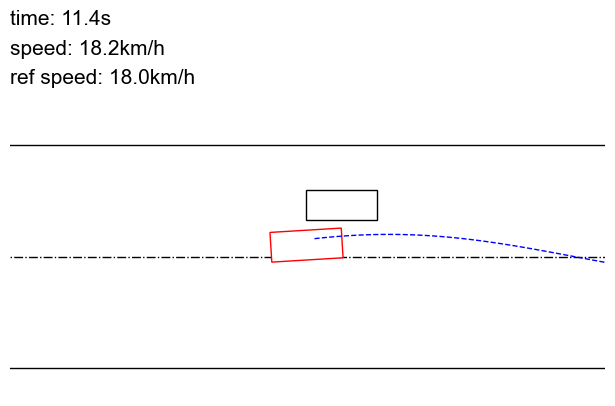

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.27283549308776855 



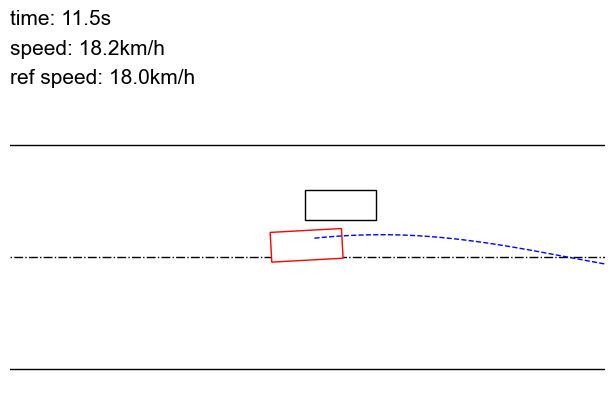

b'Maximum number of iterations exceeded (can be specified by an option).'
Summary statistics:
* Number of iterations: 200
* Cost function calls: 249
* Constraint calls: 453
* System simulations: 702
* Final cost: 0.2713589668273926 



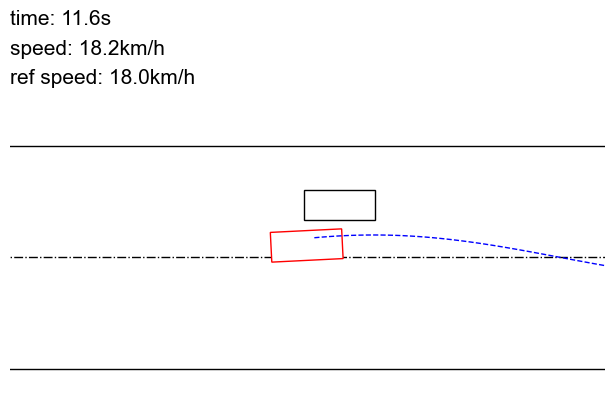

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.2696905732154846 



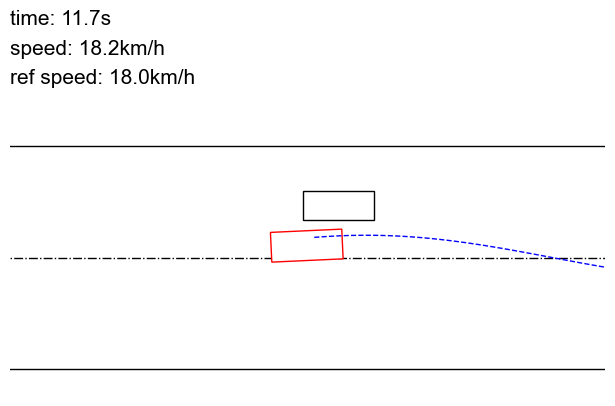

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 12
* Cost function calls: 14
* Constraint calls: 30
* System simulations: 44
* Final cost: 0.26473337411880493 



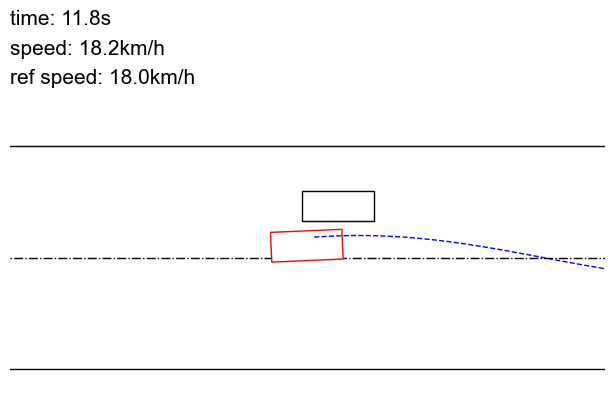

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 11
* Cost function calls: 13
* Constraint calls: 28
* System simulations: 41
* Final cost: 0.25634363293647766 



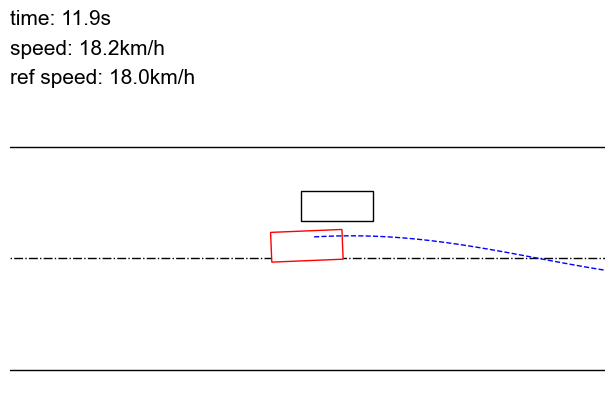

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.24471740424633026 



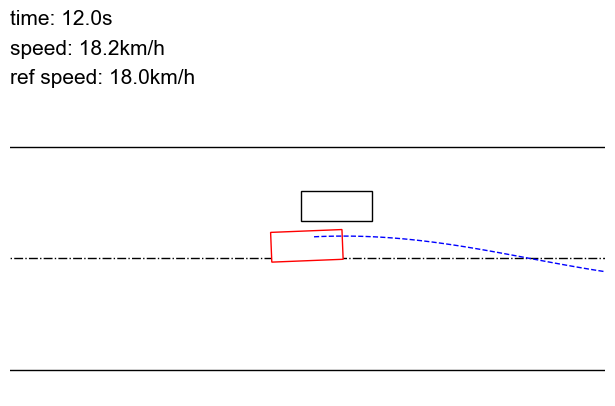

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.23053625226020813 



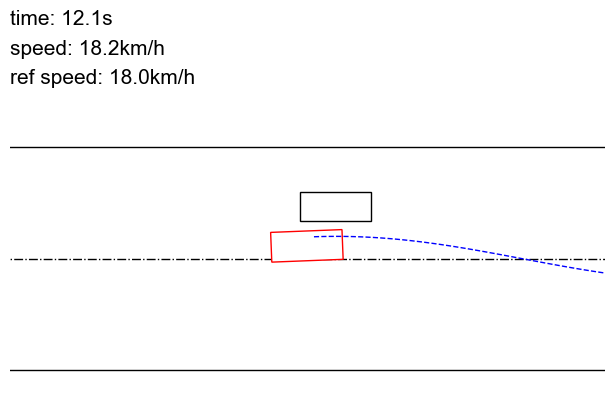

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.2149396389722824 



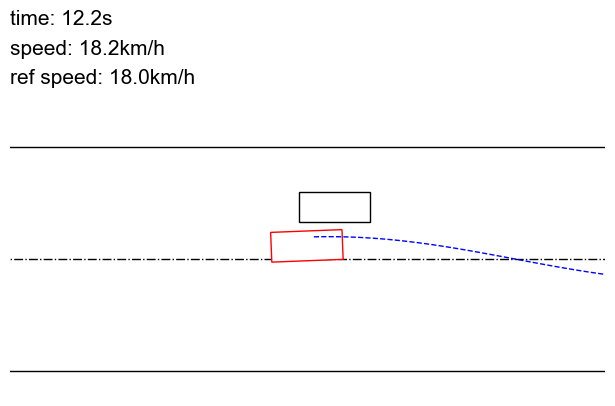

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.19841629266738892 



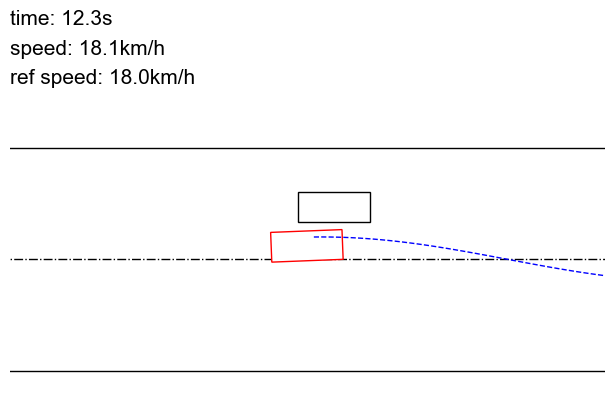

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.18156060576438904 



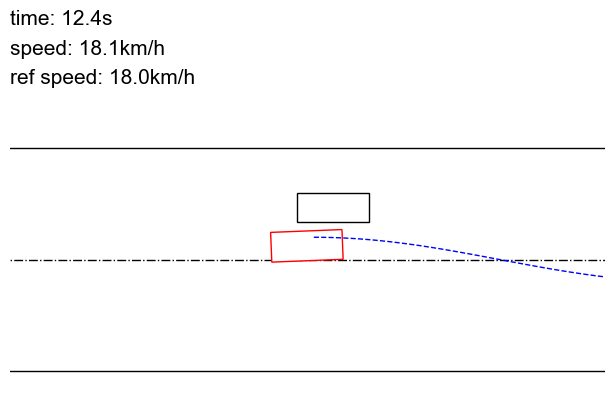

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.16499119997024536 



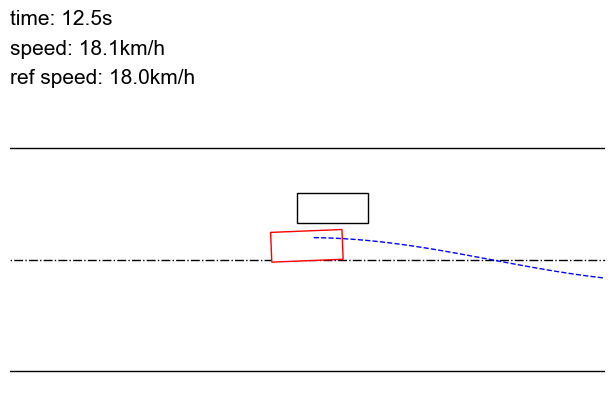

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.14932605624198914 



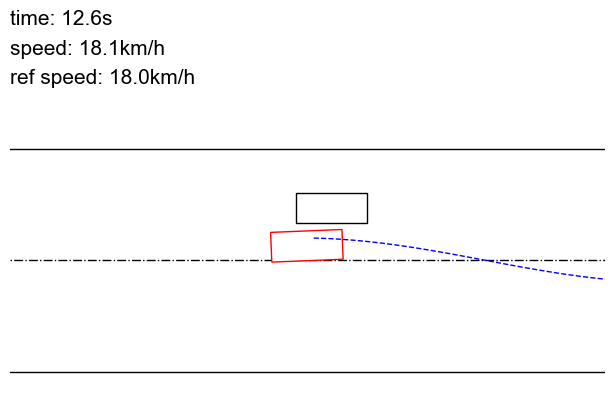

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.1349286139011383 



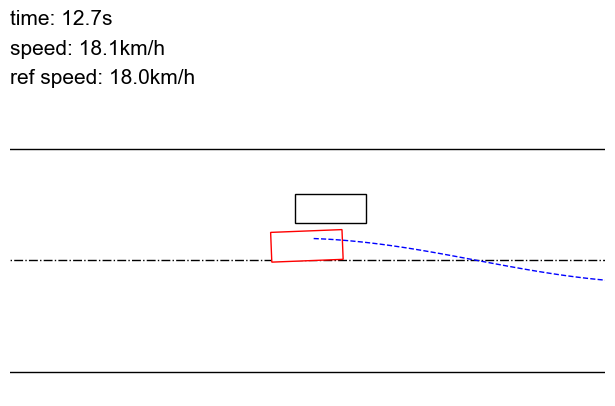

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.12186960875988007 



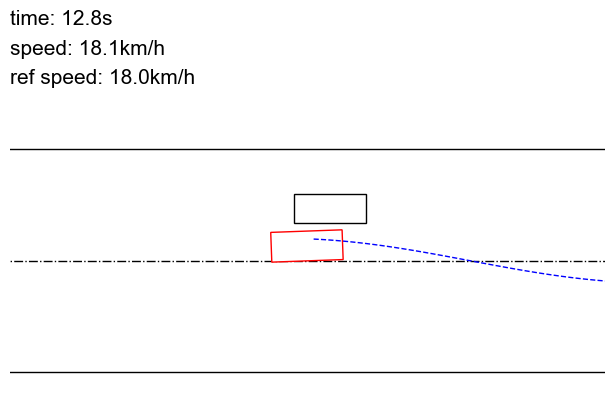

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.11015895009040833 



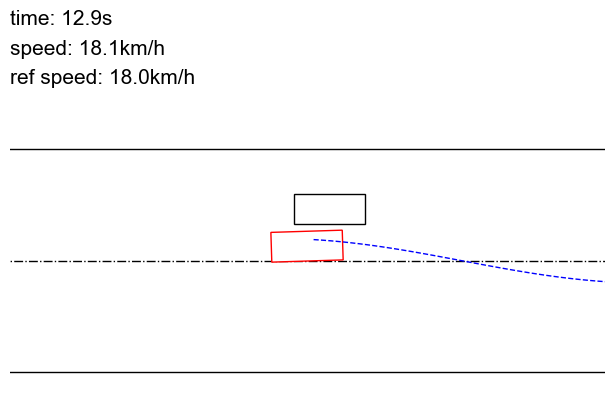

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.09953775256872177 



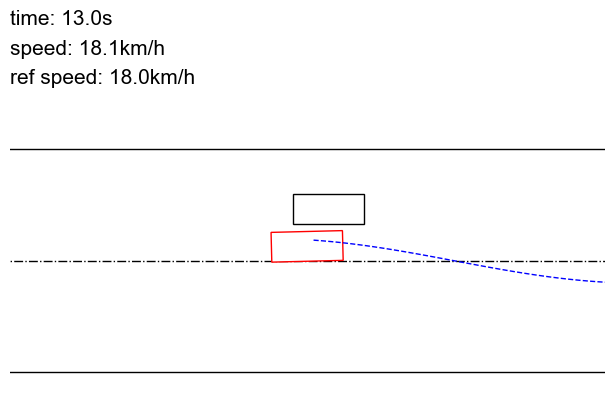

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 9
* Constraint calls: 20
* System simulations: 29
* Final cost: 0.08996793627738953 



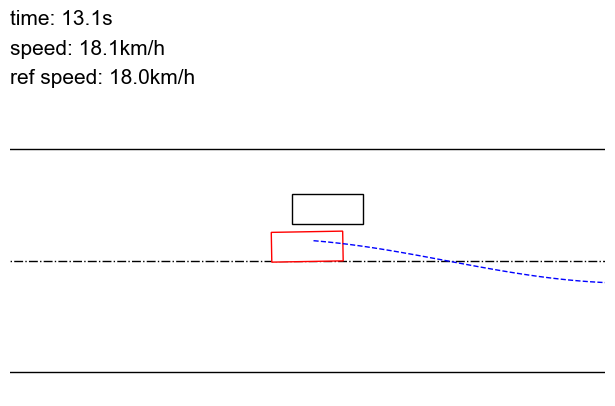

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.08135505765676498 



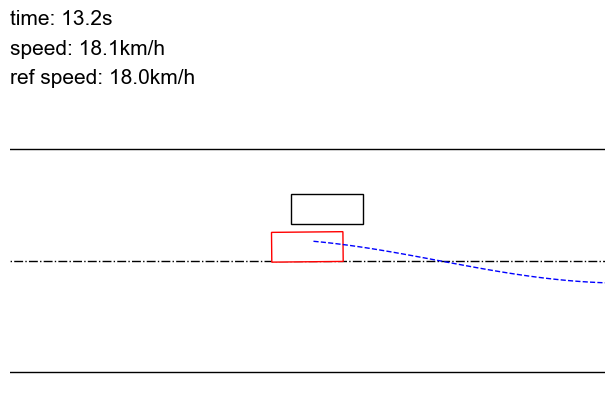

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 9
* Cost function calls: 10
* Constraint calls: 23
* System simulations: 33
* Final cost: 0.07353552430868149 



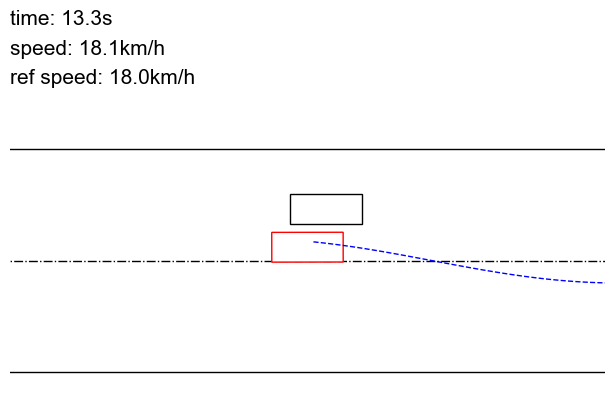

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 8
* Cost function calls: 9
* Constraint calls: 21
* System simulations: 30
* Final cost: 0.06651796400547028 



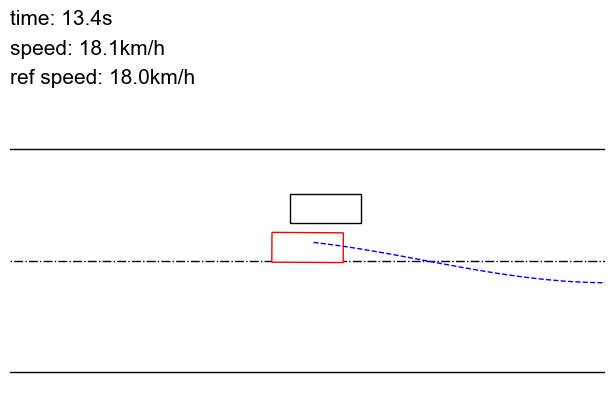

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 7
* Cost function calls: 8
* Constraint calls: 19
* System simulations: 27
* Final cost: 0.06020905077457428 



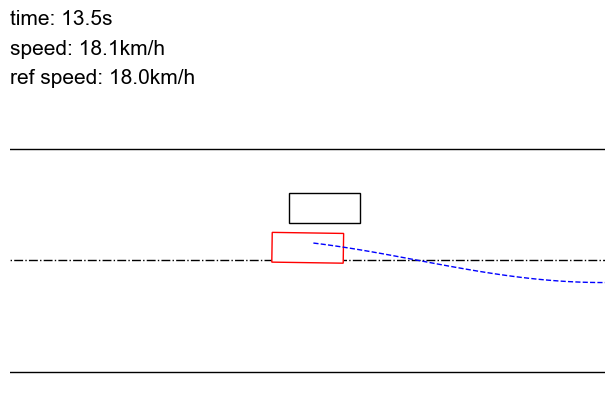

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.05449893698096275 



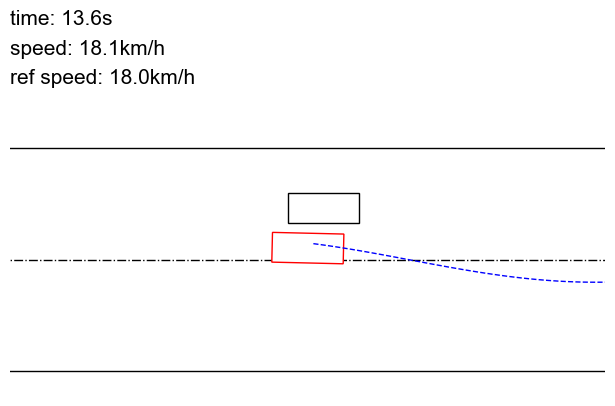

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.049174387007951736 



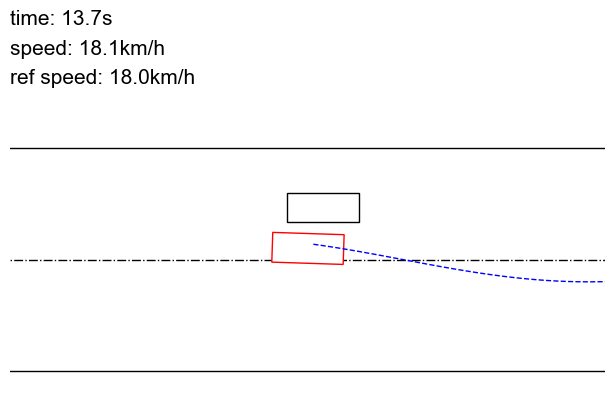

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 7
* Constraint calls: 16
* System simulations: 23
* Final cost: 0.044123575091362 



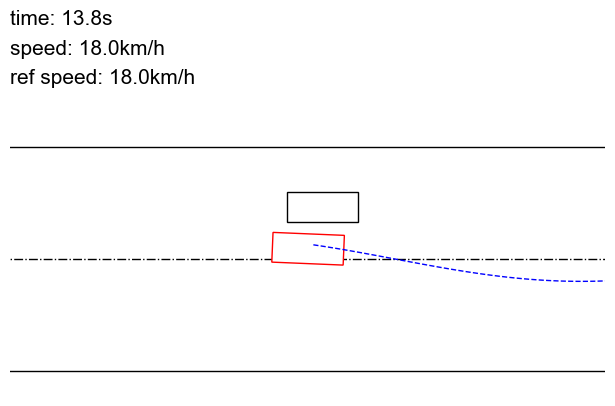

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.039341751486063004 



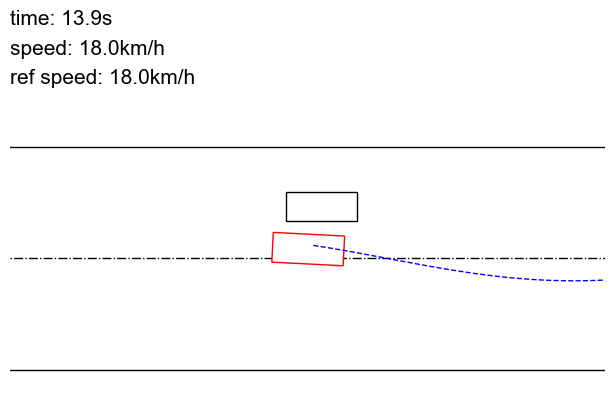

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03468472510576248 



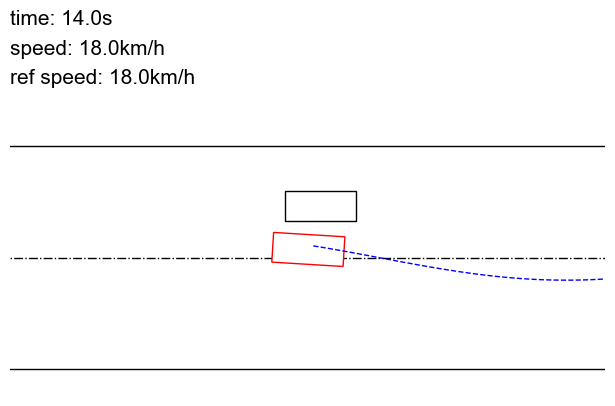

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.030276037752628326 



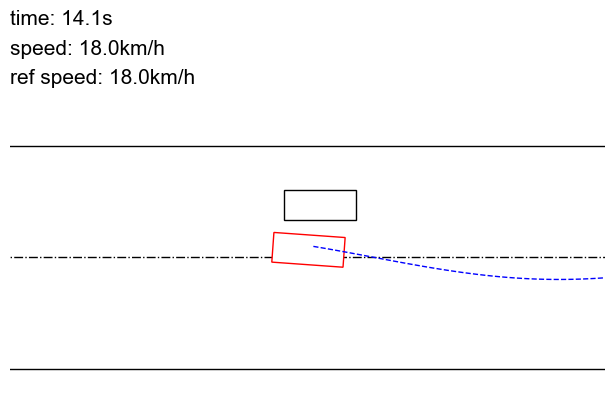

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.02616094797849655 



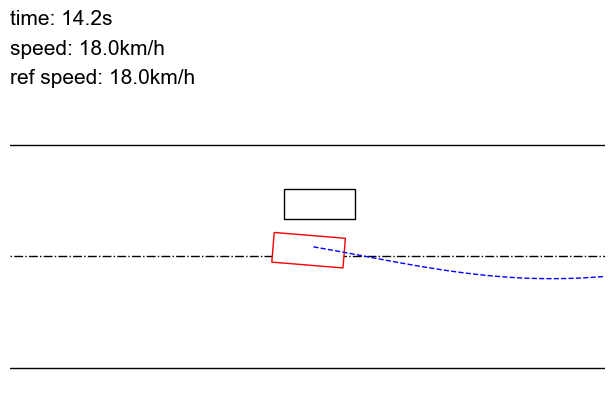

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.02237776666879654 



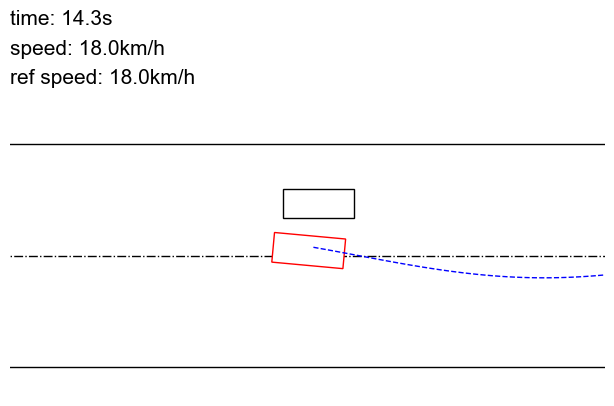

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.01896095462143421 



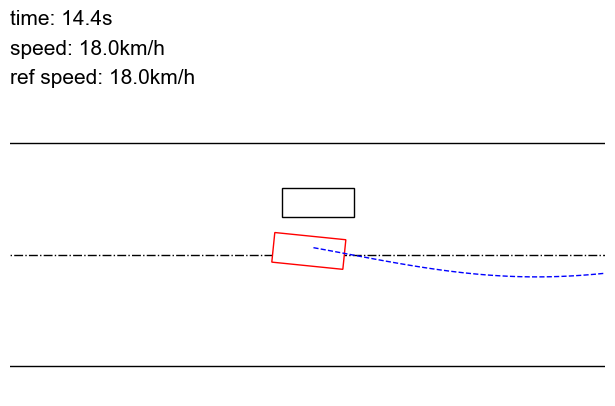

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.01595522090792656 



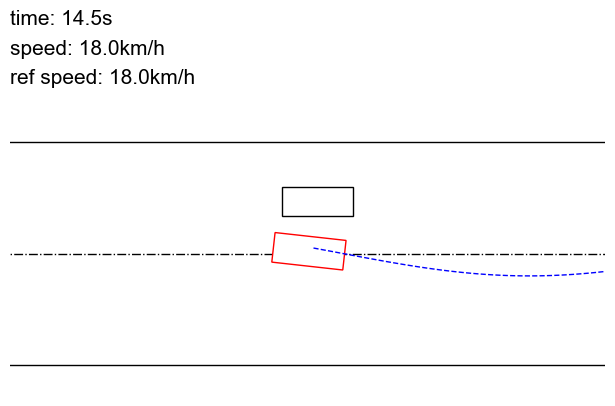

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.013387353159487247 



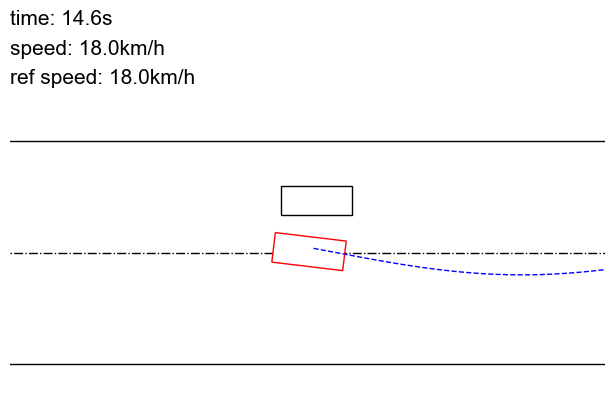

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.011273267678916454 



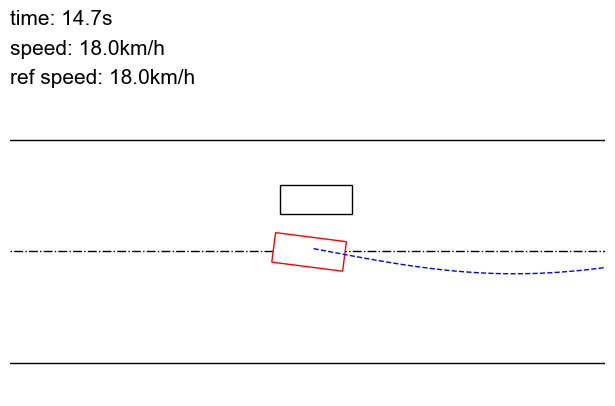

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.009620391763746738 



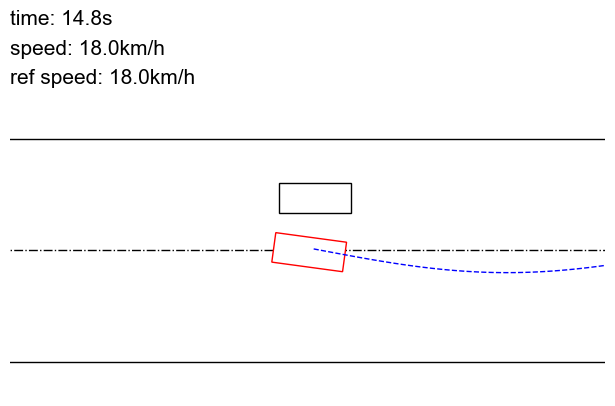

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.008433391340076923 



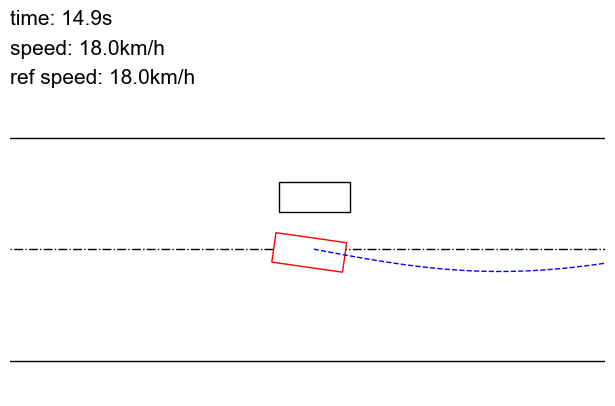

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.007703030947595835 



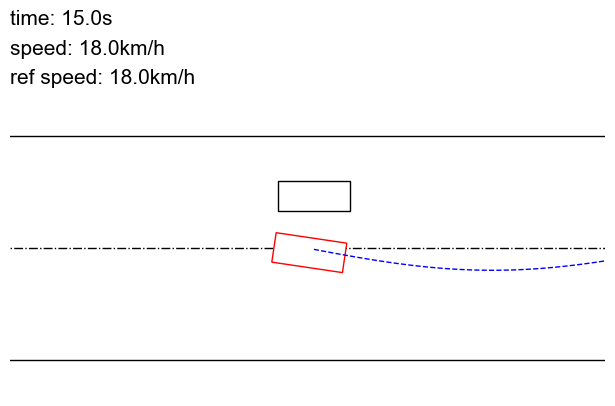

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.00741177424788475 



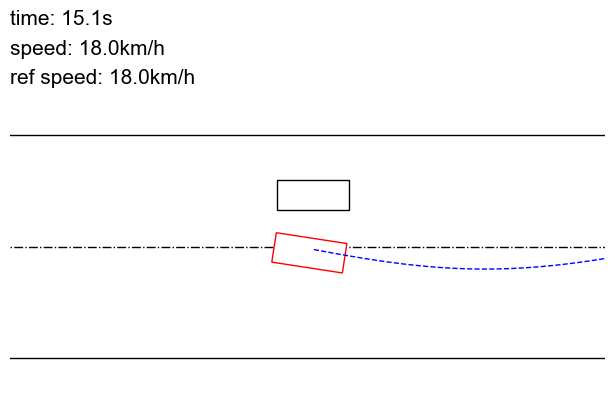

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.007536328863352537 



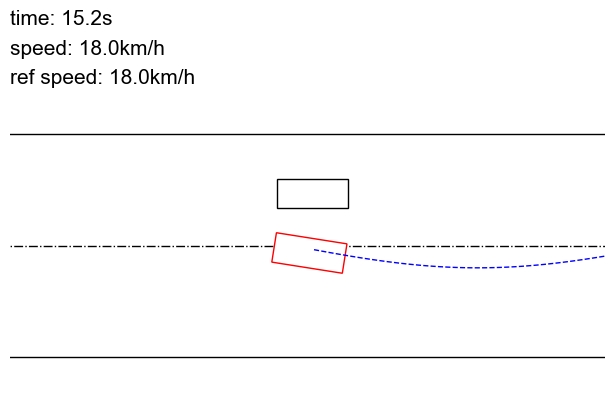

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.008045150898396969 



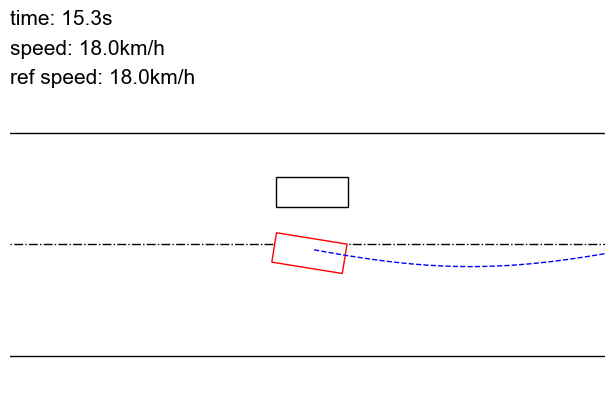

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.00890511367470026 



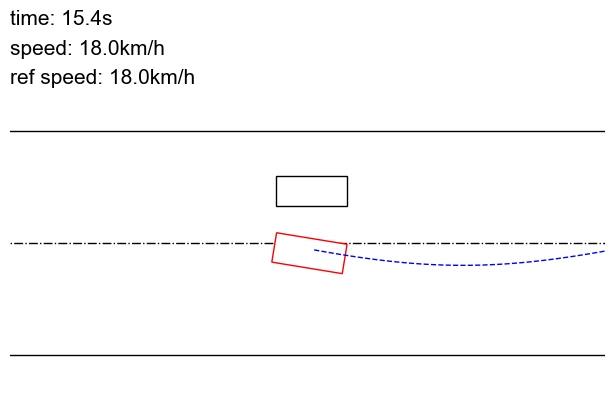

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.010076873935759068 



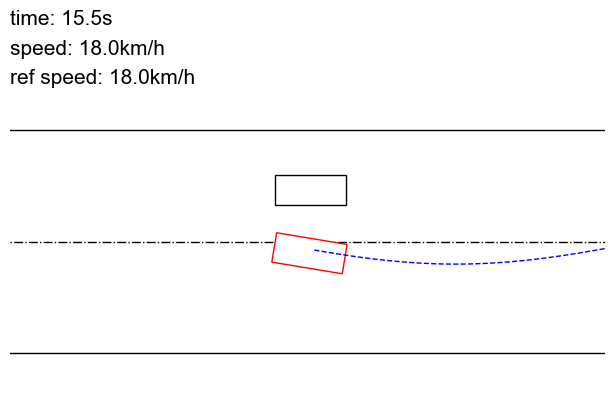

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.011518602259457111 



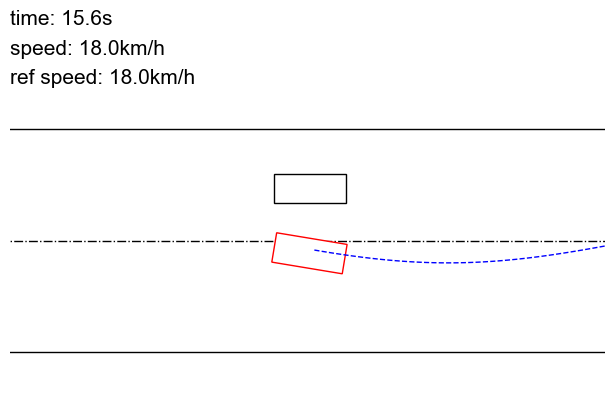

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.013187846168875694 



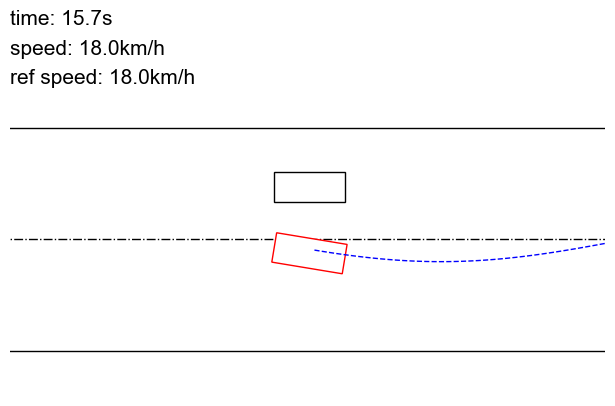

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.01503995805978775 



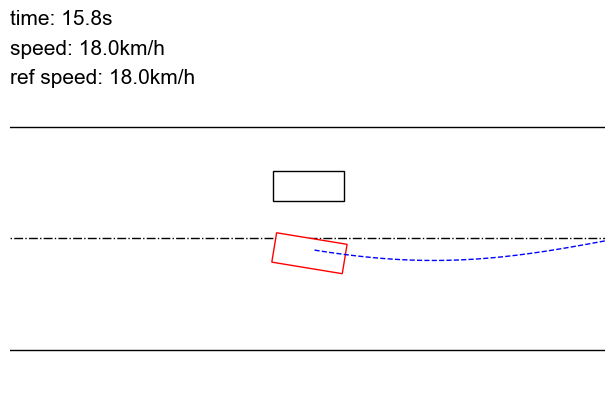

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.01703035458922386 



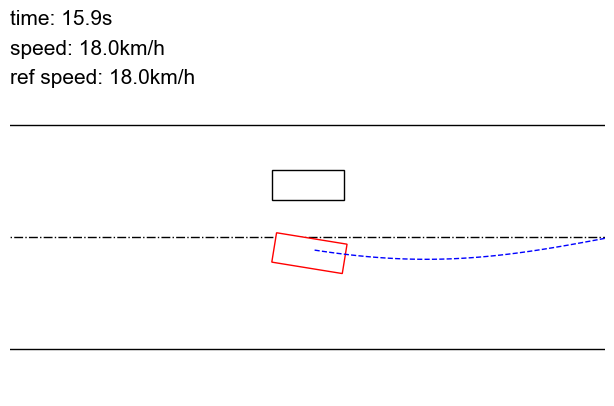

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.019112398847937584 



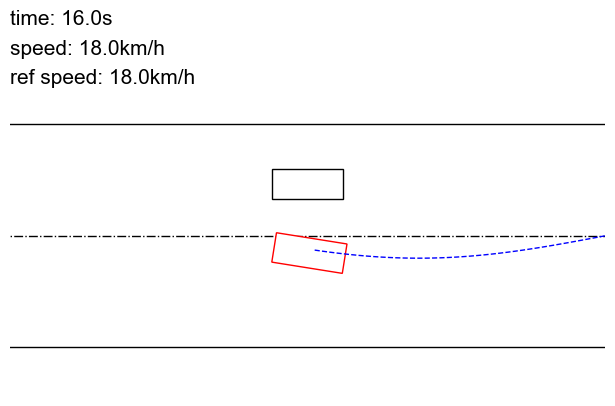

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.02124398574233055 



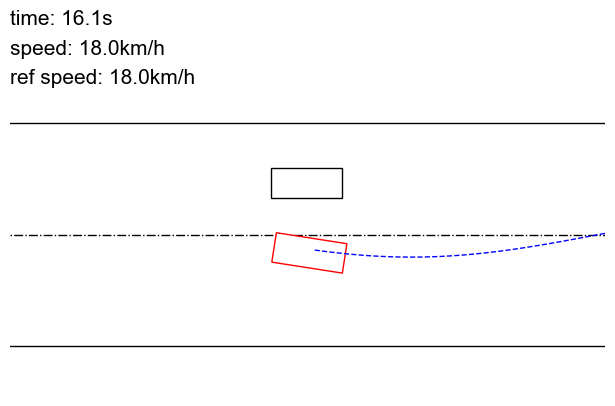

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.023381659761071205 



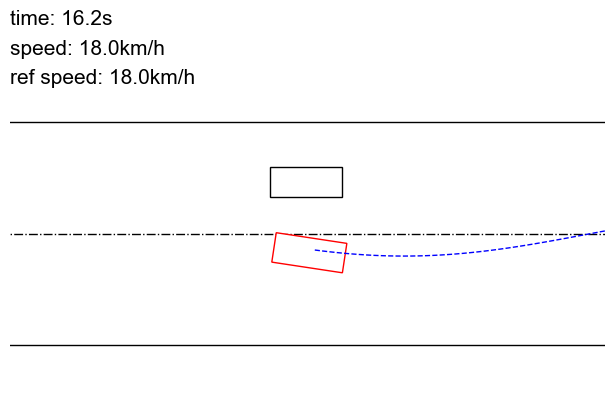

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.02548489160835743 



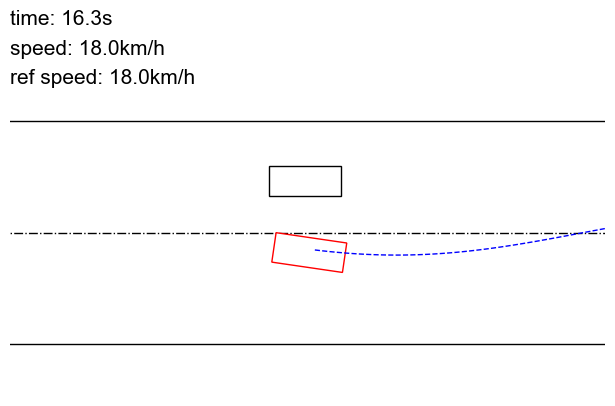

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.027515346184372902 



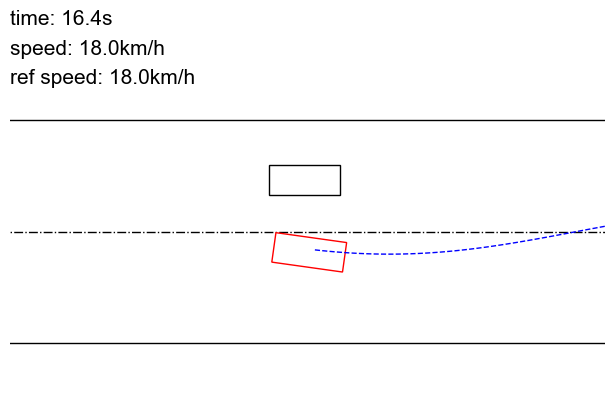

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.029434209689497948 



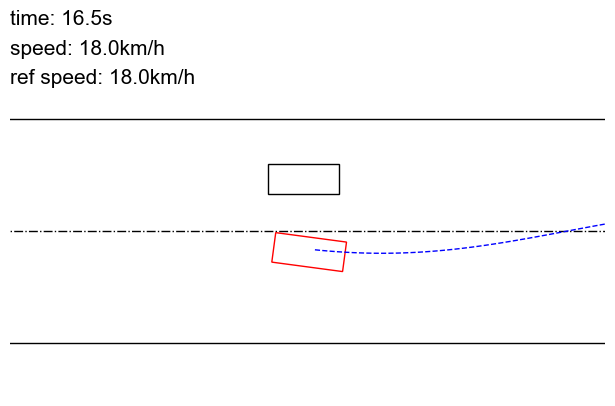

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.031207721680402756 



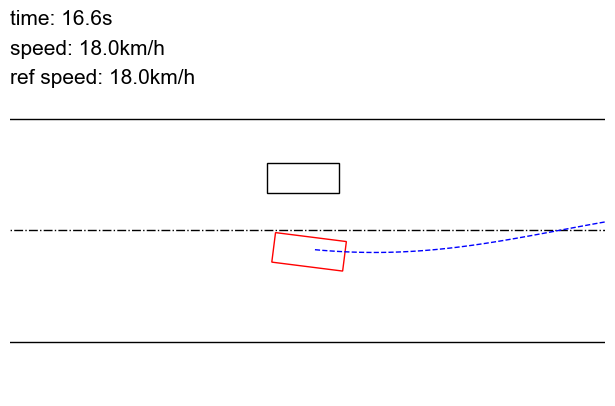

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.03280532360076904 



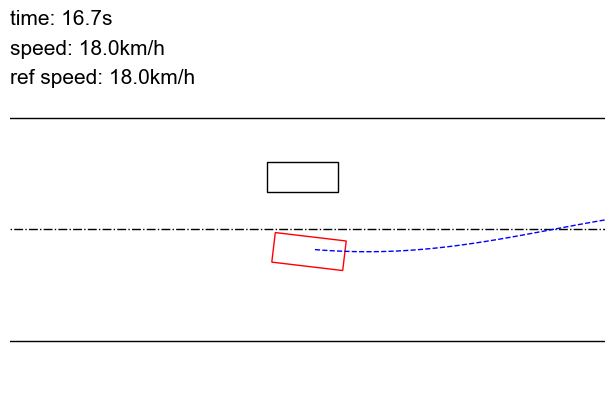

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.0342017225921154 



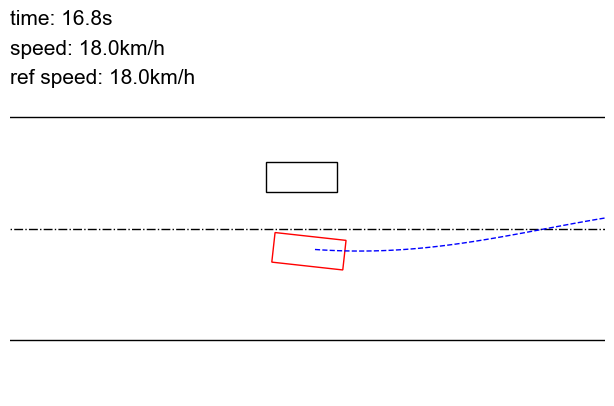

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03537243604660034 



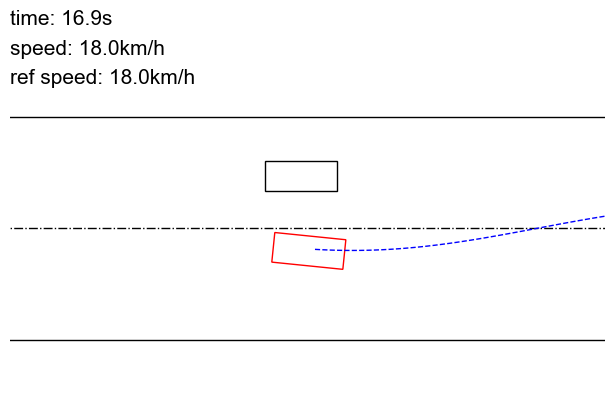

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03628935292363167 



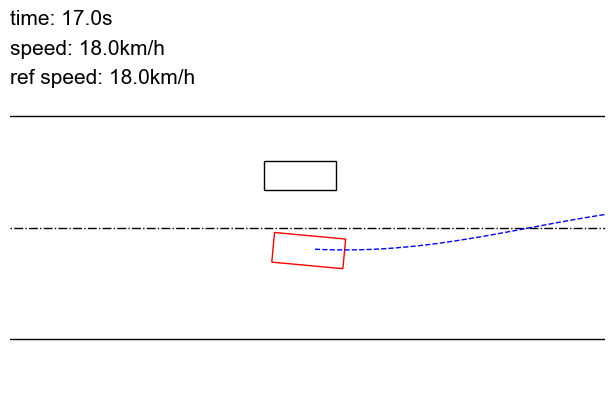

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03695790469646454 



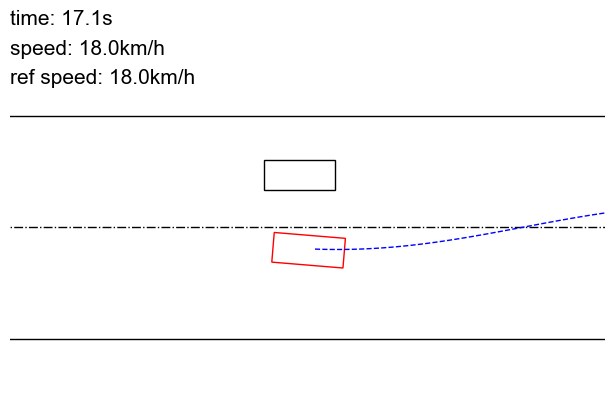

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.037357814610004425 



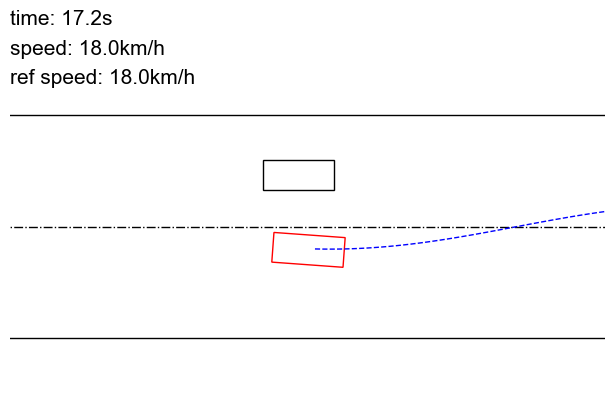

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03747912496328354 



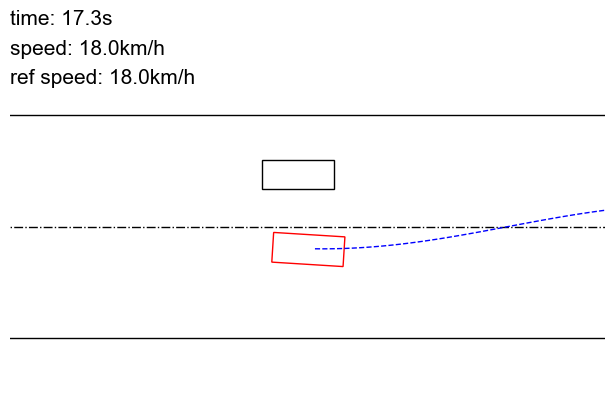

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03731924295425415 



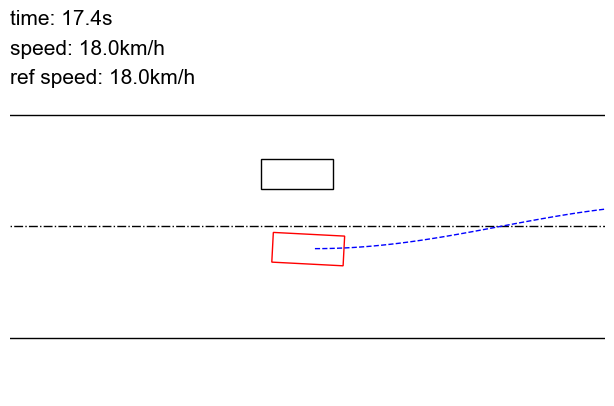

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.036915961652994156 



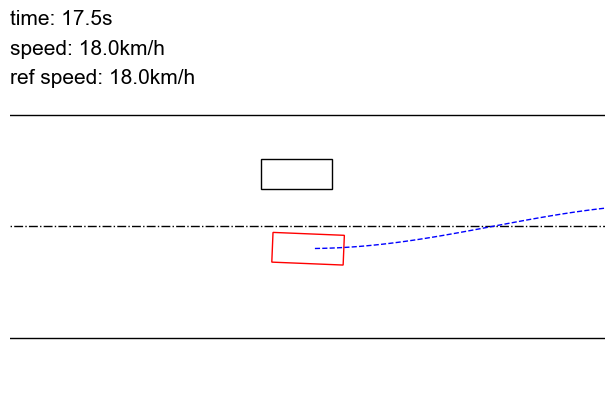

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.03624542057514191 



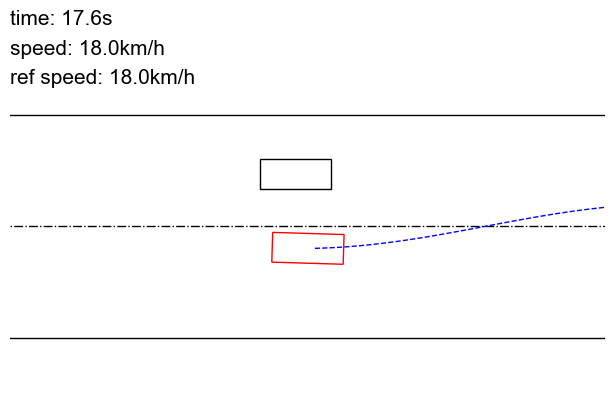

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.035324156284332275 



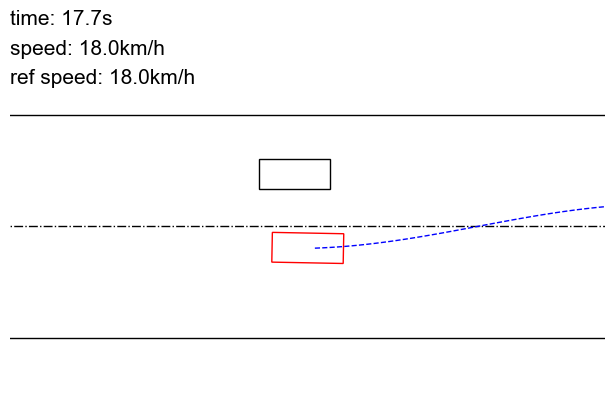

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.034184884279966354 



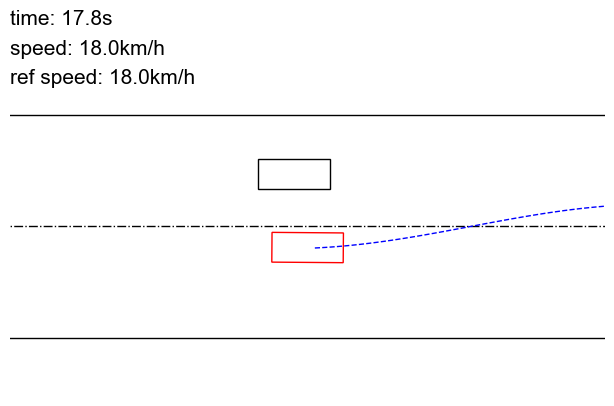

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.03284822776913643 



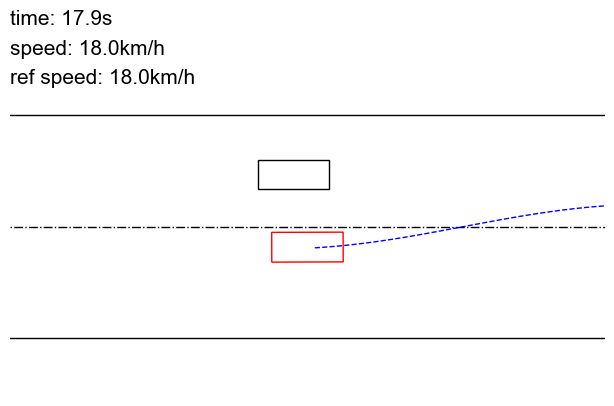

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.031337883323431015 



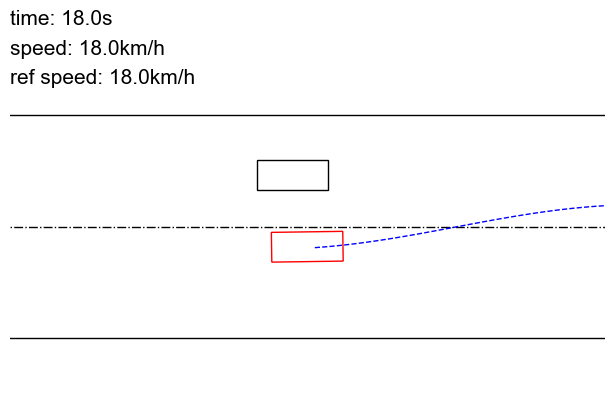

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.029677964746952057 



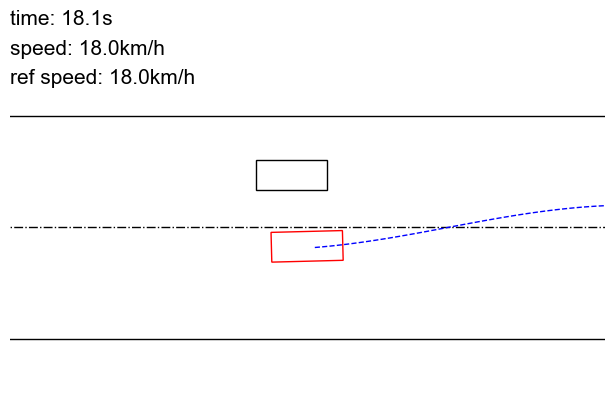

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 5
* Constraint calls: 13
* System simulations: 18
* Final cost: 0.027911344543099403 



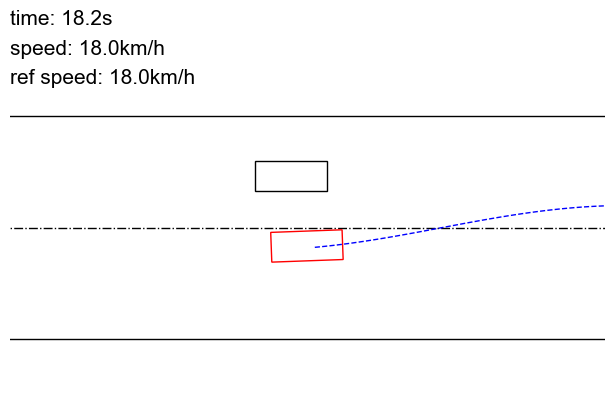

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.026088325306773186 



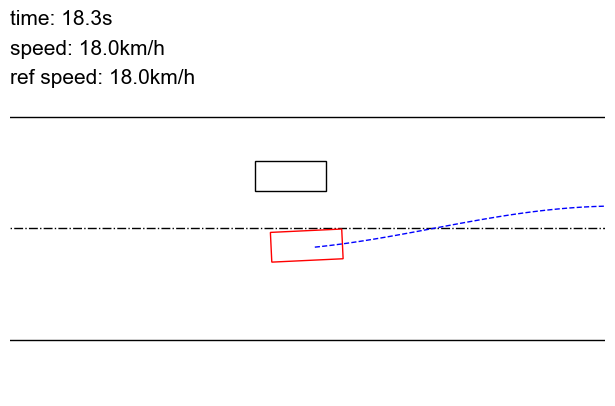

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.02418363094329834 



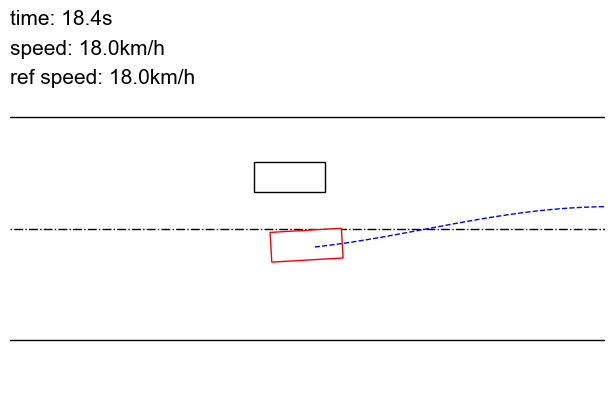

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.022292237728834152 



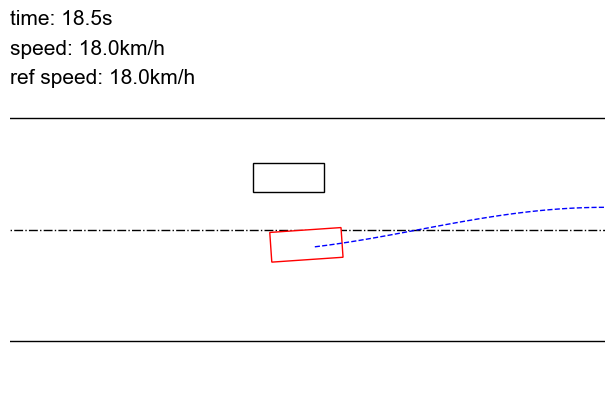

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.02043960429728031 



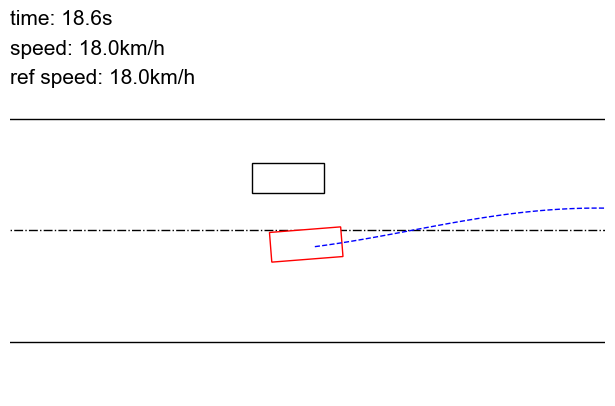

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.018667614087462425 



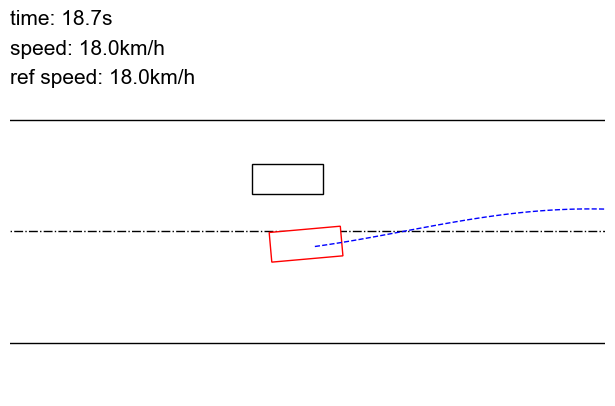

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 6
* Constraint calls: 13
* System simulations: 19
* Final cost: 0.017002109438180923 



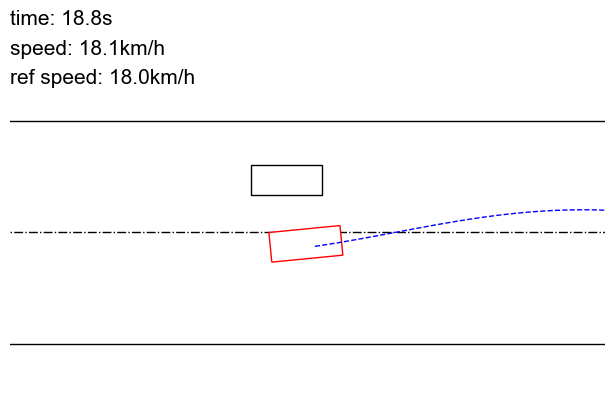

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 5
* Constraint calls: 12
* System simulations: 17
* Final cost: 0.01546700019389391 



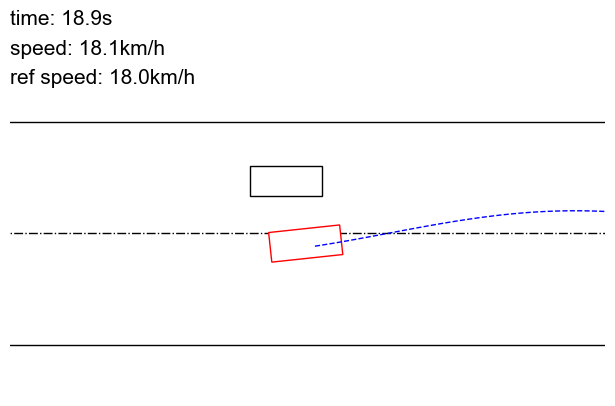

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 5
* Constraint calls: 12
* System simulations: 17
* Final cost: 0.014088268391788006 



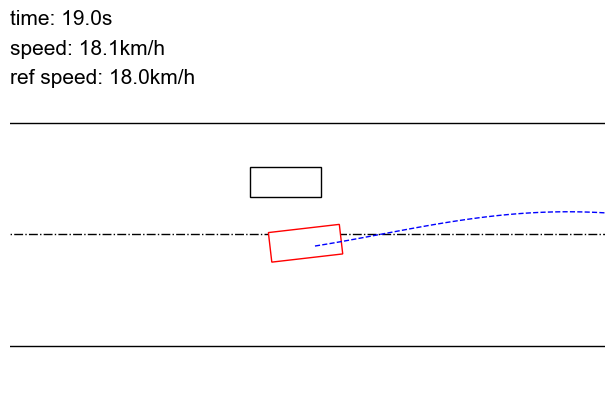

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 4
* Cost function calls: 6
* Constraint calls: 14
* System simulations: 20
* Final cost: 0.012889268808066845 



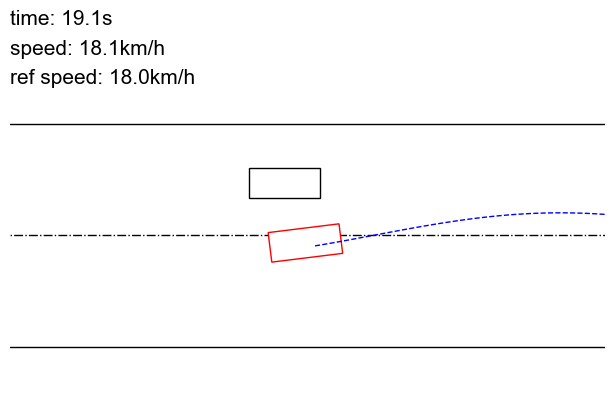

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 3
* Cost function calls: 4
* Constraint calls: 11
* System simulations: 15
* Final cost: 0.011872487142682076 



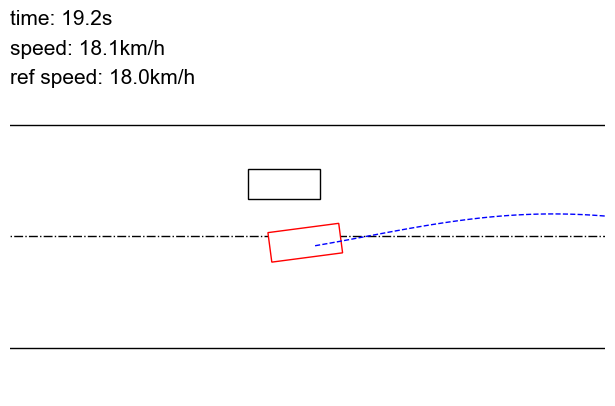

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.012951221317052841 



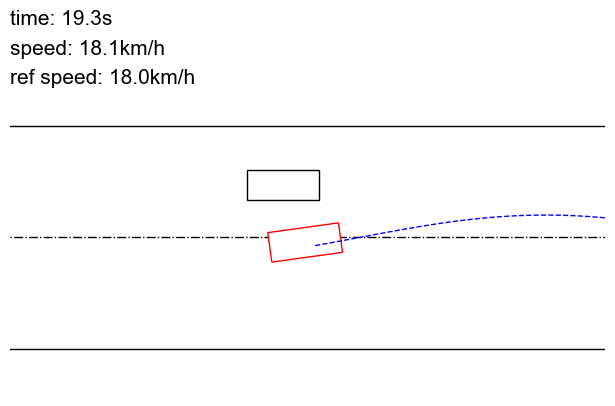

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 7
* Constraint calls: 17
* System simulations: 24
* Final cost: 0.019449451938271523 



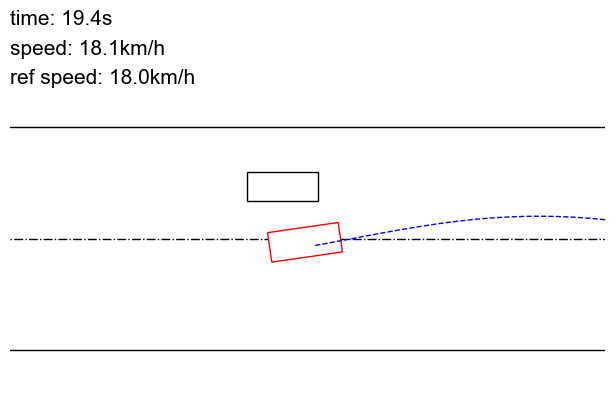

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.0305562075227499 



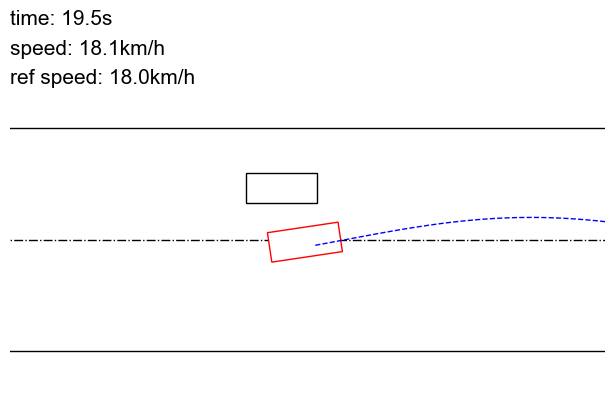

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.045369938015937805 



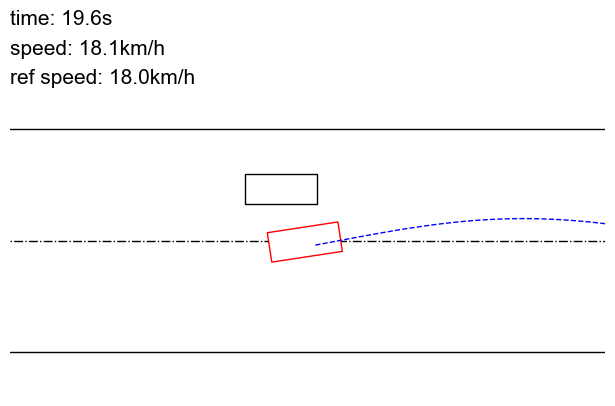

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.06304863095283508 



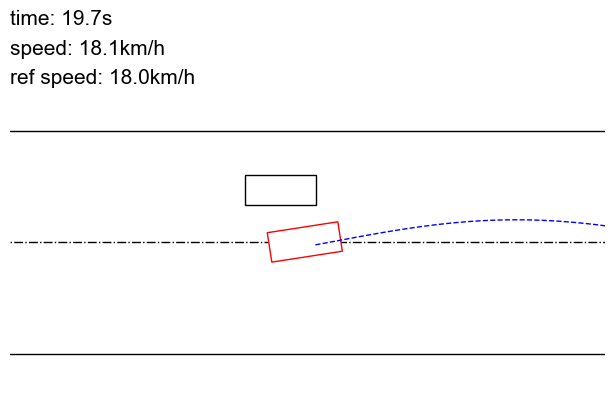

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.08280681073665619 



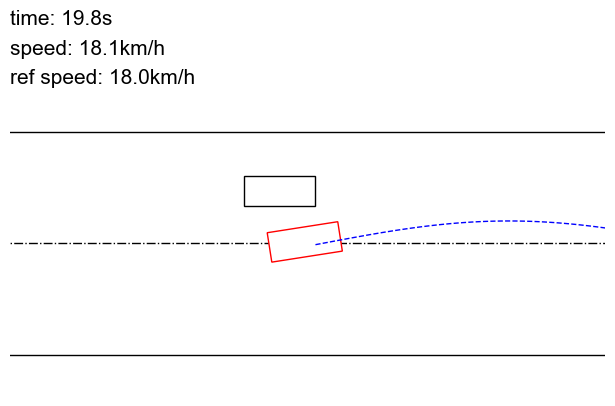

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 5
* Cost function calls: 6
* Constraint calls: 15
* System simulations: 21
* Final cost: 0.10389392077922821 



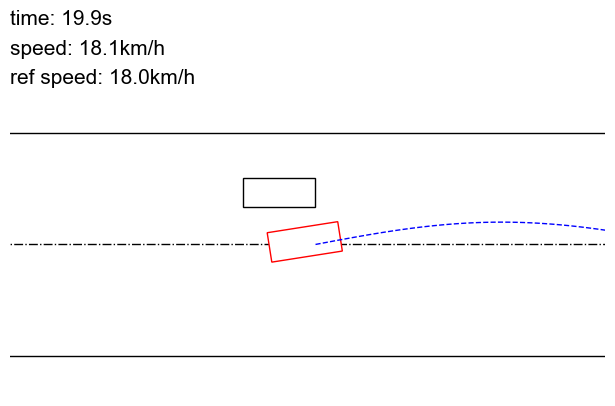

b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
Summary statistics:
* Number of iterations: 6
* Cost function calls: 8
* Constraint calls: 18
* System simulations: 26
* Final cost: 0.1256028115749359 



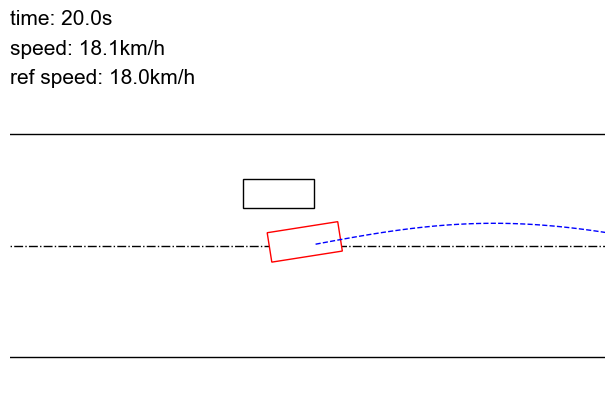

In [2]:
from src.shared import get_env
from src.tester import mpc_sample_episodes_batched_with_infos
from src.env.tracking.pyth_veh3dofconti_surrcstr_model import Veh3dofcontiSurrCstrModel
env_name = "tracking_model"

nn_dir = "02-21-23_02.20.50_DRPO_99" # fill in this
log_dir = "MPC"

# load cfg from the trained model
cfg = Config()
model = Veh3dofcontiSurrCstrModel(**cfg.env_cfg)

assert log_dir is not None, 'Must specify --run-dir'
run_dir = LOGS_DIR / nn_dir
assert run_dir.is_dir(), f'Run directory does not exist: {run_dir}'

with (run_dir / 'config.json').open('r') as f:
    saved_cfg = json.load(f)
    cfg.update(saved_cfg)

cfg.alg_cfg.update(dict(mode='test'))
cfg.env_cfg.update(dict(render=True))

# Ensure all required arguments have been set
for attr in ('env_name', 'seed'):
    assert hasattr(cfg, attr), f'Config must specify {attr}'

# creat MPC controller
env = get_env(env_name, wrap_torch = False, rescale_action = False, **{**cfg.env_cfg, **dict(id=0)})
opt_args = cfg.opt_args
MPC_controller = OptController(model, **opt_args,)

# load model and set env
test_log_dir = run_dir / log_dir
test_log_dir.mkdir(exist_ok=True, parents=True)

print(f'Test log directory: {test_log_dir}')

# run evaluation
print("env", env)
test_traj, info_traj = mpc_sample_episodes_batched_with_infos(env, MPC_controller, 1)

In [3]:
lengths = [len(traj) for traj in test_traj]
length_mean = float(np.mean(lengths))

returns = [traj.get('rewards').sum().item() for traj in test_traj]
return_mean = float(np.mean(returns))

print(f'test length mean: {length_mean}')
print(f'test return mean: {return_mean}')

test length mean: 200.0
test return mean: -0.757606565952301


In [4]:
# get necessary data trajectories
traj_len = len(test_traj[0].get("actions"))
time_steps = np.arange(traj_len) * 0.1

surrs_states = np.array(info_traj[0]["surr_state"], dtype=np.float32)
states = np.array(info_traj[0]["state"], dtype=np.float32)
actions = np.array(test_traj[0].get("actions").cpu().numpy(), dtype=np.float32)
constraints = np.array(info_traj[0]["constraint_value"], dtype=np.float32)
video = np.array(info_traj[0]["img"], dtype=np.float32) / 255.0

ego_pos = states[:, :2]
ref_pos = np.array(info_traj[0]["ref_points"], dtype=np.float32)[:, 0, :2]
surrs_poses = surrs_states[:, :, :2]

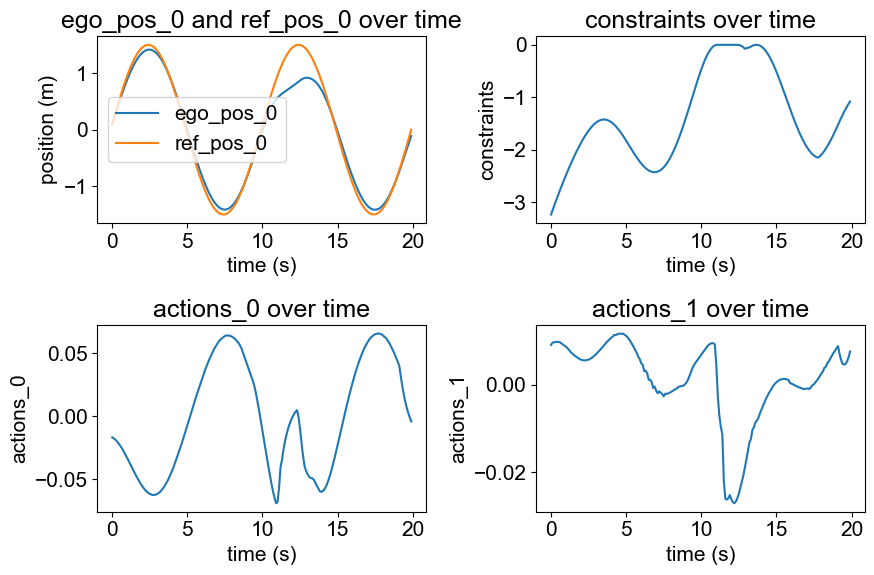

In [5]:
# plot curves
# draw a 2 * 2 figure, where the top left is the ref_pos_1 (red) and ego_pos_1 (blue) evolution
# over time; top right the constraints; bottom left the actions_0; bottom right the actions_1
fig, axs = plt.subplots(2, 2, figsize=(9, 6))
axs[0, 0].plot(time_steps, ego_pos[:, 1], label="ego_pos_0")
axs[0, 0].plot(time_steps, ref_pos[:, 1], label="ref_pos_0")
axs[0, 0].set_title("ego_pos_0 and ref_pos_0 over time")
axs[0, 0].set_xlabel("time (s)")
axs[0, 0].set_ylabel("position (m)")
axs[0, 0].legend()

axs[0, 1].plot(time_steps, constraints)
axs[0, 1].set_title("constraints over time")
axs[0, 1].set_xlabel("time (s)")
axs[0, 1].set_ylabel("constraints")

axs[1, 0].plot(time_steps, actions[:, 0])
axs[1, 0].set_title("actions_0 over time")
axs[1, 0].set_xlabel("time (s)")
axs[1, 0].set_ylabel("actions_0")

axs[1, 1].plot(time_steps, actions[:, 1])
axs[1, 1].set_title("actions_1 over time")
axs[1, 1].set_xlabel("time (s)")
axs[1, 1].set_ylabel("actions_1")

fig.tight_layout()

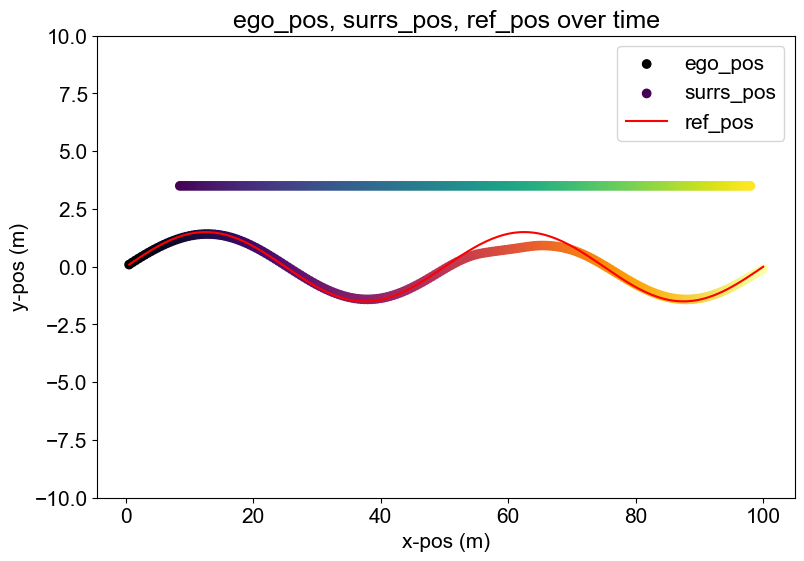

In [6]:
# draw a figure about the ego_pos, surrs_poses, ref_pos evoluation
# x-pos_0, y-pos_1 with scatter
# the color should be darker as time goes by

fig, axs = plt.subplots(1, 1, figsize=(9, 6))
axs.scatter(ego_pos[:, 0], ego_pos[:, 1], c=time_steps, label="ego_pos", cmap="inferno")
axs.scatter(surrs_poses[:, :, 0], surrs_poses[:, :, 1], c=time_steps, label="surrs_pos", cmap="viridis")
axs.plot(ref_pos[:, 0], ref_pos[:, 1], label="ref_pos", c="red")
axs.set_title("ego_pos, surrs_pos, ref_pos over time")
axs.set_xlabel("x-pos (m)")
axs.set_ylabel("y-pos (m)")
axs.set_ylim(-10, 10)
axs.legend()

In [7]:
# draw animations
fig = plt.figure()
im = plt.imshow(video[0,:,:,:])
plt.axis('off')

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:,:])

def animate(i):
    im.set_data(video[i,:,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())

In [8]:
# create a dataframe to store the data
data = {
    "time_step": time_steps, 
    "ego_pos_0": ego_pos[:, 0], "ego_pos_1": ego_pos[:, 1], 
    "surrs_pos_0": surrs_poses[:, :, 0].squeeze(), "surrs_pos_1": surrs_poses[:, :, 1].squeeze(),
    "ref_pos_0": ref_pos[:, 0], "ref_pos_1": ref_pos[:, 1],
    "actions_0": actions[:, 0], "actions_1": actions[:, 1],
    "constraints": constraints,
    "time": info_traj[0]["time"],
}
df = pd.DataFrame(data=data)
df.to_csv(test_log_dir / "mpc_data.csv")
df

time_step  ego_pos_0  ego_pos_1  surrs_pos_0  surrs_pos_1  ref_pos_0  \
0          0.0   0.491347   0.092617     8.450000          3.5        0.5   
1          0.1   0.983485   0.181530     8.900000          3.5        1.0   
2          0.2   1.476096   0.268380     9.350000          3.5        1.5   
3          0.3   1.969126   0.353417     9.800000          3.5        2.0   
4          0.4   2.462578   0.436578    10.250000          3.5        2.5   
..         ...        ...        ...          ...          ...        ...   
195       19.5  97.973732  -0.425748    96.199997          3.5       98.0   
196       19.6  98.469353  -0.346269    96.650002          3.5       98.5   
197       19.7  98.965065  -0.267113    97.099998          3.5       99.0   
198       19.8  99.460915  -0.188525    97.550003          3.5       99.5   
199       19.9  99.956947  -0.110685    98.000000          3.5      100.0   

        ref_pos_1  actions_0  actions_1  constraints      time  
0    9.418578e-02  -0.016768   0.009041    -3.235607  0.810941  
1    1.879998e-01  -0.017510   0.009539    -3.154751  0.707916  
2    2.810720e-01  -0.018524   0.009644    -3.075266  0.704570  
3    3.730348e-01  -0.019764   0.009697    -2.996875  0.709330  
4    4.635255e-01  -0.021188   0.009724    -2.919553  0.714715  
..            ...        ...        ...          ...       ...  
195 -3.730348e-01   0.011672   0.004561    -1.281238  1.041822  
196 -2.810720e-01   0.006827   0.004693    -1.226545  1.007271  
197 -1.879998e-01   0.002558   0.005245    -1.174811  1.066374  
198 -9.418578e-02  -0.001019   0.006214    -1.126149  1.037715  
199 -7.347881e-16  -0.004136   0.007513    -1.080625  1.271294  

[200 rows x 11 columns]